Лабораторная работа №2
"Понижение размерности пространства признаков"
Выполнил: Мартынов В.А., ДПИ-15

Загрузка данных

In [2]:
# 1.1 Загрузил датасет
# 1.2 Создал Python скрипт. Загрузил датасет в датафрейм, и разделил данные на описательные признаки и признак отображающий класс.

import pandas as pd
import numpy as np

df = pd.read_csv('glass.csv')

var_names = list(df.columns) #получение имен признаков

labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

In [3]:
# 1.3 Провёл нормировку данных к интервалу [0 1]

from sklearn import preprocessing

data = preprocessing.minmax_scale(data)

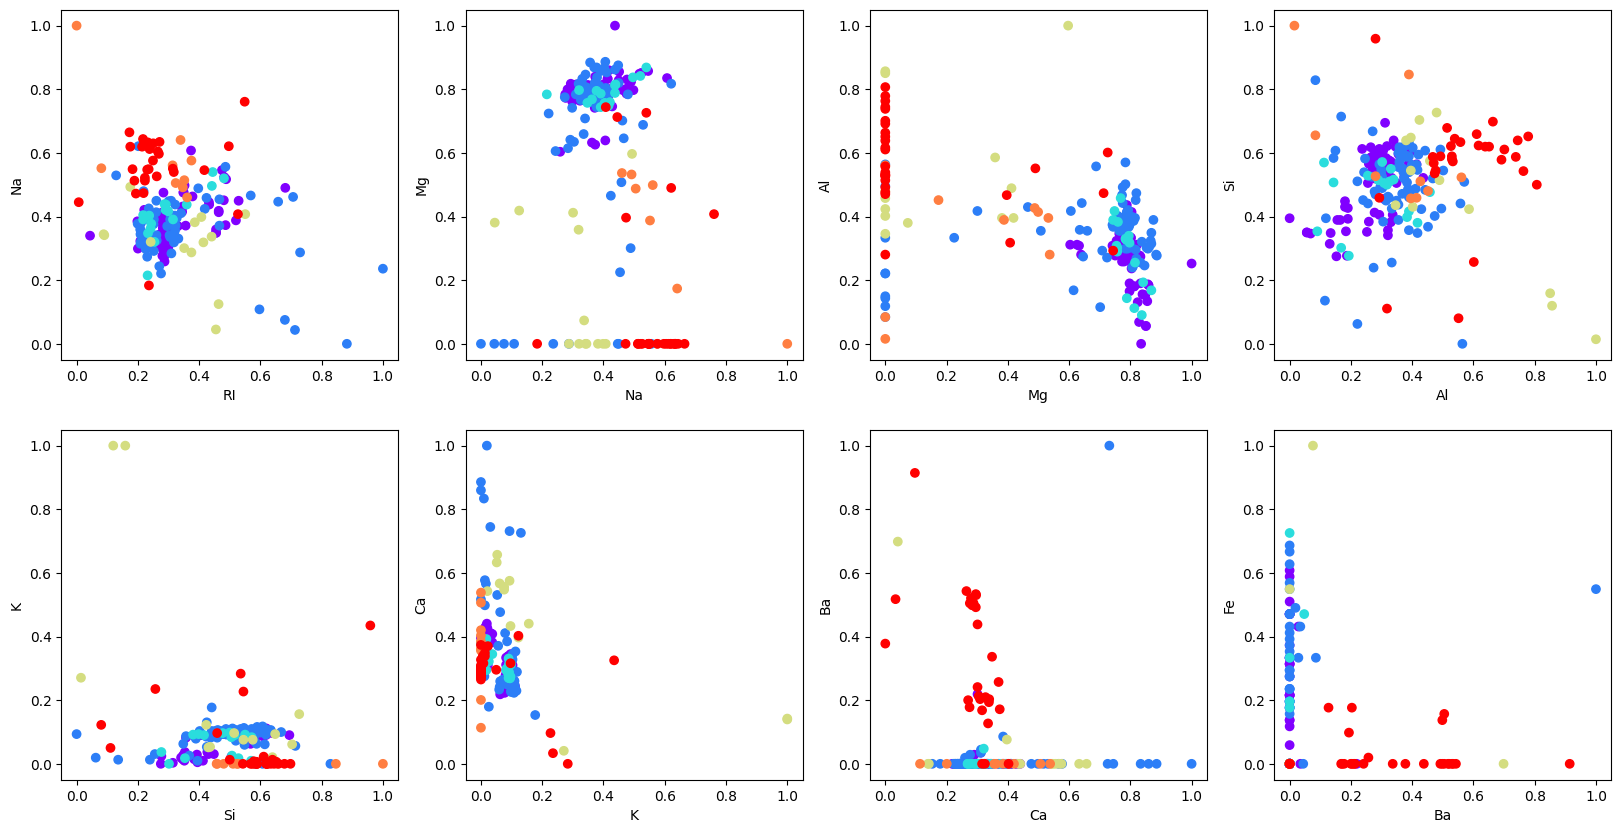

In [4]:
# 1.4.1 Построил диаграммы рассеяния для пар признаков

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,4)

fig.set_figheight(10)
fig.set_figwidth(20)

for i in range(data.shape[1]-1):
    axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='rainbow')

    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])
plt.show()

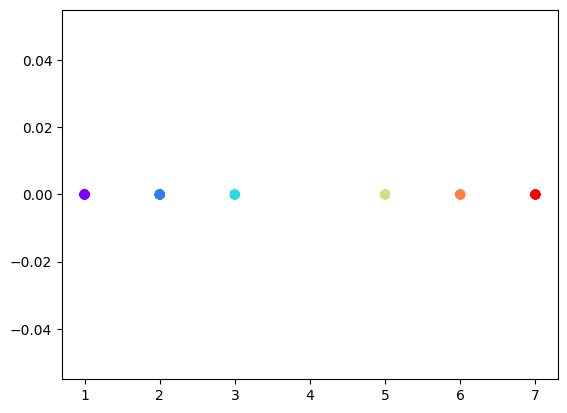

1 building_windows_float
2 building_windows_non_float
3 vehicle_windows_float
4 vehicle_windows_non_float (none in this database)
5 containers
6 tableware
7 headlamps


In [24]:
# 1.4.2 Чтобы определить цвет на диаграмме и класс в датасете, следует с помощью функции scatter пострить scatter-plot с использованием метки классов по label-ам

plt.scatter(labels, [0]*len(labels), c=labels, cmap='rainbow')

plt.show()

print('1 building_windows_float')
print('2 building_windows_non_float')
print('3 vehicle_windows_float')
print('4 vehicle_windows_non_float (none in this database)')
print('5 containers')
print('6 tableware')
print('7 headlamps')

Метод главных компонент

In [6]:
# 2.1 Воспользуемся методом главных компонентов (PCA). Проведем понижение размерности пространства до размерности 2.

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca_data = pca.fit(data).transform(data)

In [7]:
# 2.2 Далее выведем значение объясненной дисперсии в процентах и собственные числа соответствующие компонентам

print('Дисперсия в процентах -',pca.explained_variance_ratio_)
print('Собственные числа -',pca.singular_values_)

Дисперсия в процентах - [0.45429569 0.17990097]
Собственные числа - [5.1049308  3.21245688]


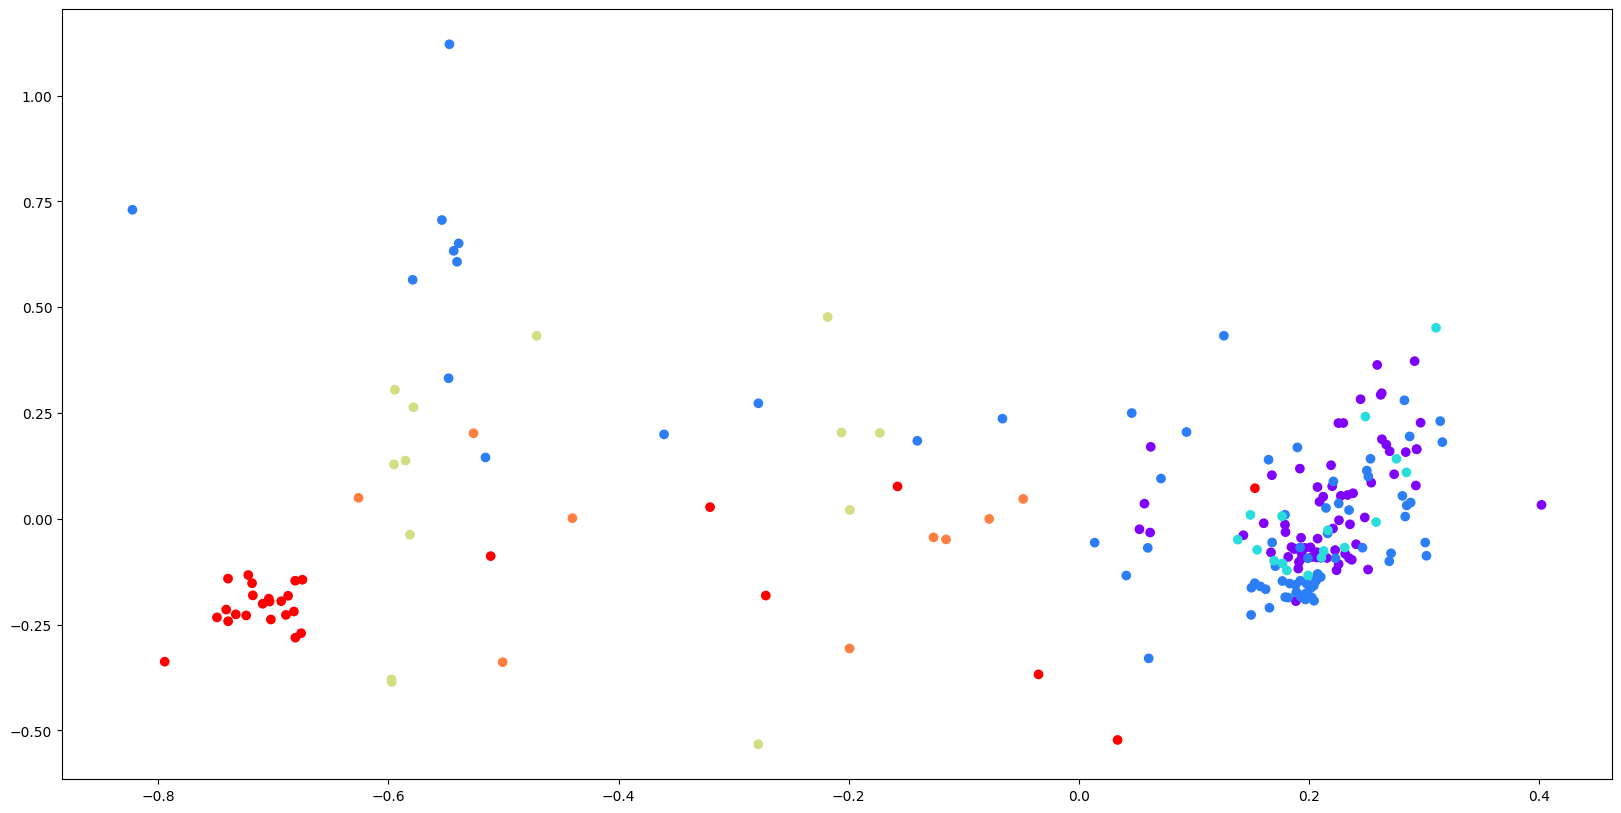

In [45]:
# 2.3 Построил диаграмму рассеяния после метода главных компонент
fig, axs = plt.subplots(1, 1, figsize=(20, 10)) 

plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='rainbow')
plt.show()

In [9]:
# 2.4 Просмотрев полученные результаты можно сделать следующий вывод: была обнаружена скученность данных в виде красных точек в левой части графика. 
# Компоненты, до которых понизили пространство - PC1 и PC2. Это означает, что для красных точек более важной составляющей является PC1, чем PC2. Для типов же 1, 2, 3 PC1 не является важным компонентом.

In [22]:
# 2.5 Теперь же потребуется изменить количество компонент, определим количество при котором компоненты объясняют не менее 85% дисперсии данных.

expl_var_sum = float()
n_components = 0
while expl_var_sum <= 0.85:
    n_components +=1
    pca = PCA(n_components)
    pca_data = pca.fit(data).transform(data)
    expl_var_ratio = pca.explained_variance_ratio_
    expl_var_sum = np.sum(expl_var_ratio)

print('Количество необходимых компонент -',n_components)
print('Общая доля объясненной дисперсии для всех выбранных компонент -',expl_var_sum)

Количество необходимых компонент - 4
Общая доля объясненной дисперсии для всех выбранных компонент - 0.8586697305102716


Восстановленные данные


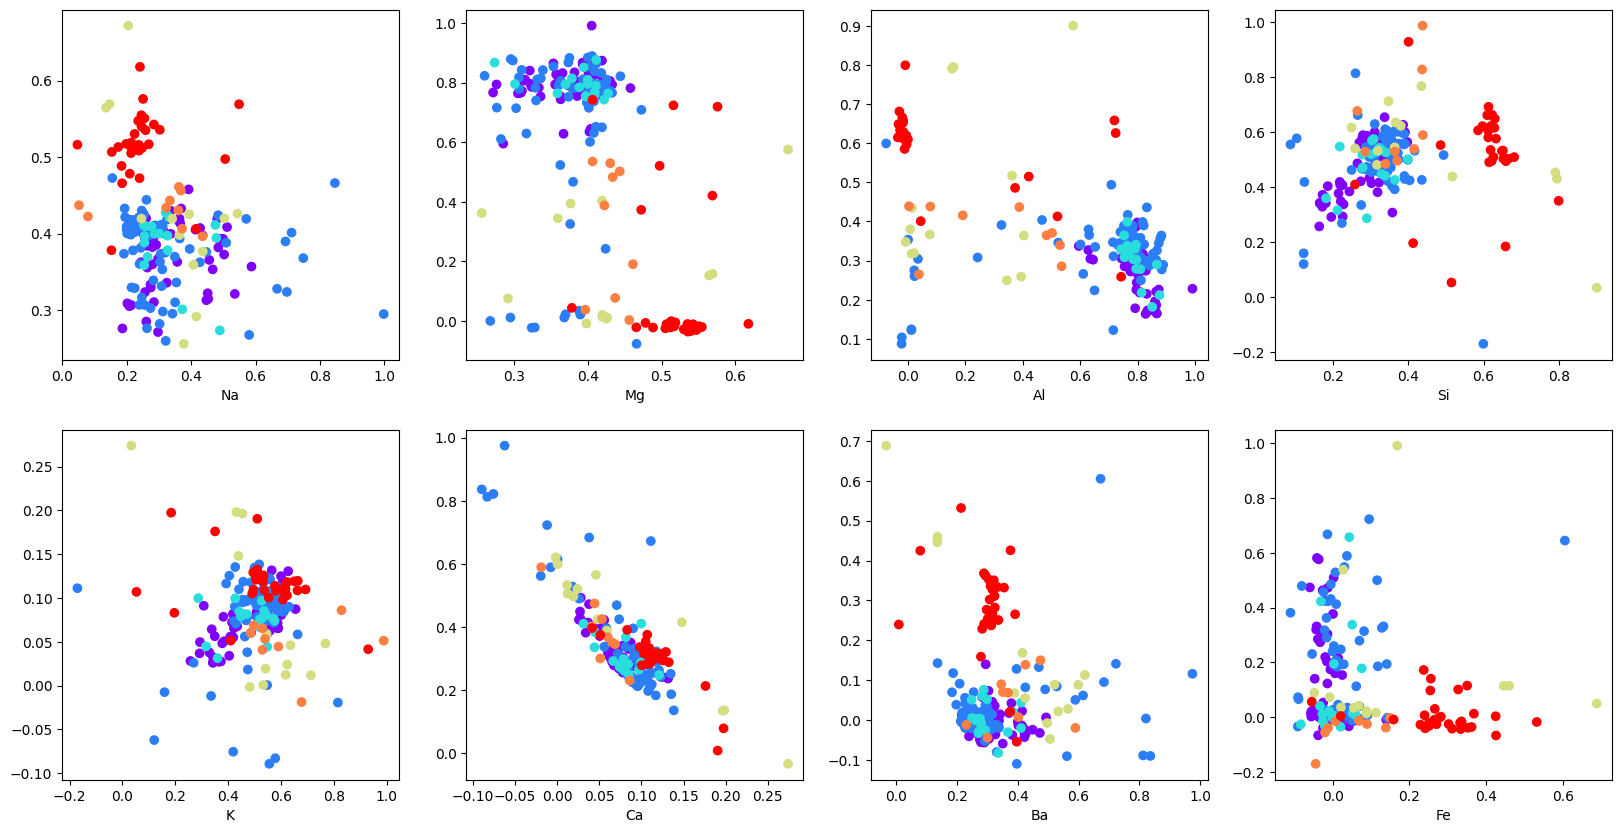

Исходные данные


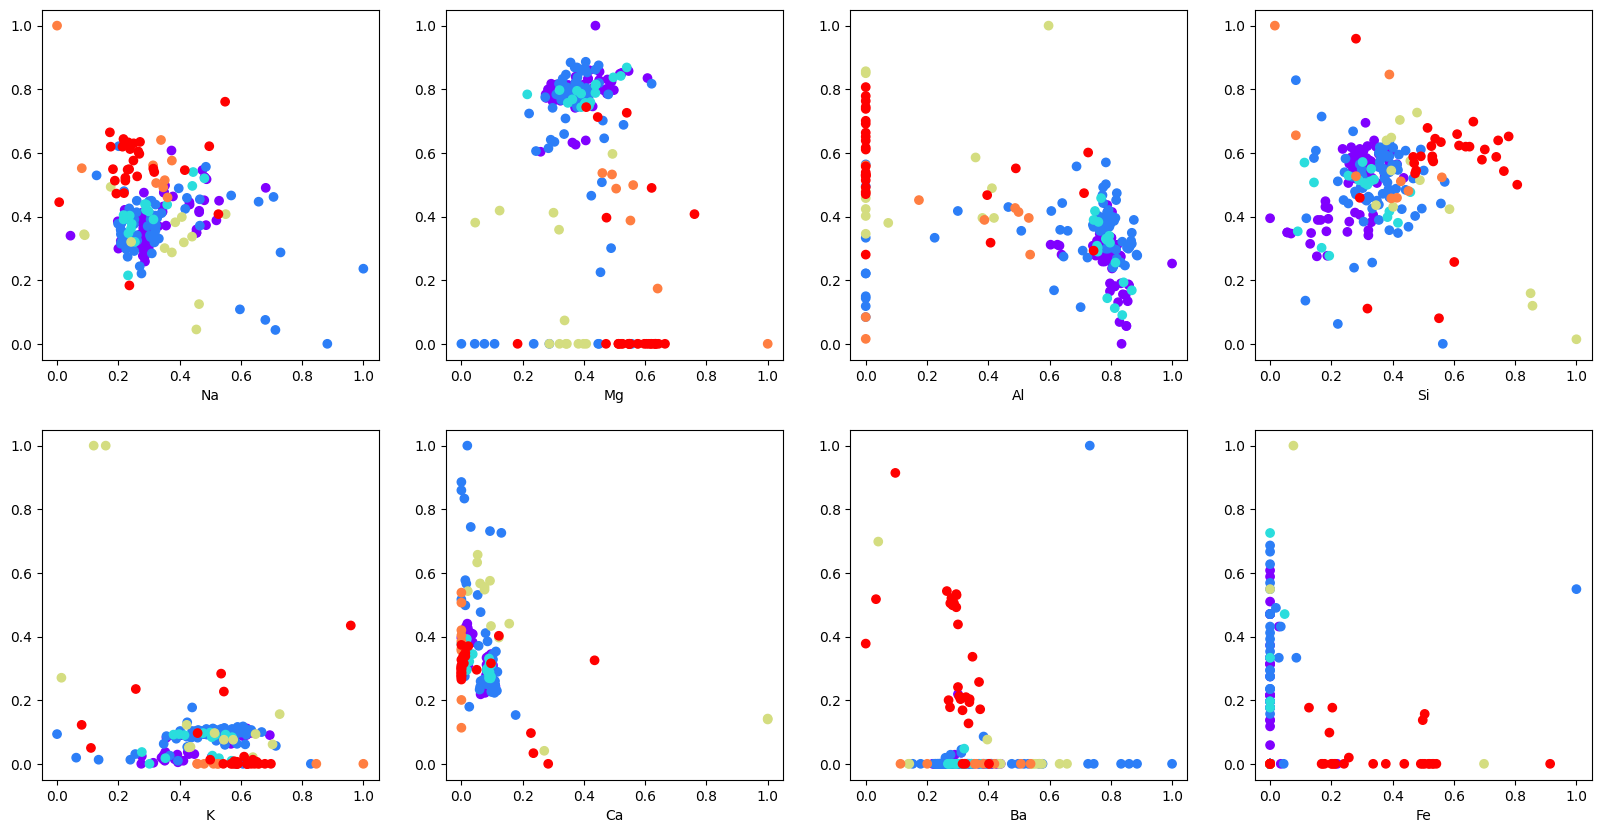

In [39]:
# 2.6 Воспользуемся методом inverse_transform восстановим данные, сравним с исходными. Рассмотрев их можно сказать, что эти данные похожи на изначальные, но не полностью. 
# Причиной этого является то, что при инверсии не учитывались компоненты, которые ответственны за 15% процентов дисперсии и именно поэтому появляется эта разница.

pca_data_inv = pca.inverse_transform(pca_data)

fig1, axs1 = plt.subplots(2,4)

fig1.set_figheight(10)
fig1.set_figwidth(20)

for i in range(data.shape[1]-1):
    axs1[i // 4, i % 4].scatter(pca_data_inv[:,i], pca_data_inv[:,(i+1)], c=labels, cmap='rainbow')

    axs1[i // 4, i % 4].set_xlabel(var_names[1])
    axs1[i // 4, i % 4].set_xlabel(var_names[i+1])
    
print('Восстановленные данные')
plt.show()

fig2, axs2 = plt.subplots(2,4)

fig2.set_figheight(10)
fig2.set_figwidth(20)

for i in range(data.shape[1]-1):
    axs2[i // 4, i % 4].scatter(data[:,i], data[:,(i+1)], c=labels, cmap='rainbow')

    axs2[i // 4, i % 4].set_xlabel(var_names[1])
    axs2[i // 4, i % 4].set_xlabel(var_names[i+1])

print('Исходные данные')
plt.show()

Доли объясненной дисперсии для главных компонент:
Компонента 1: 0.4543 (45.43%)
Компонента 2: 0.1799 (17.99%)

Сингулярные значения:
Компонента 1: 5.1049
Компонента 2: 3.2125


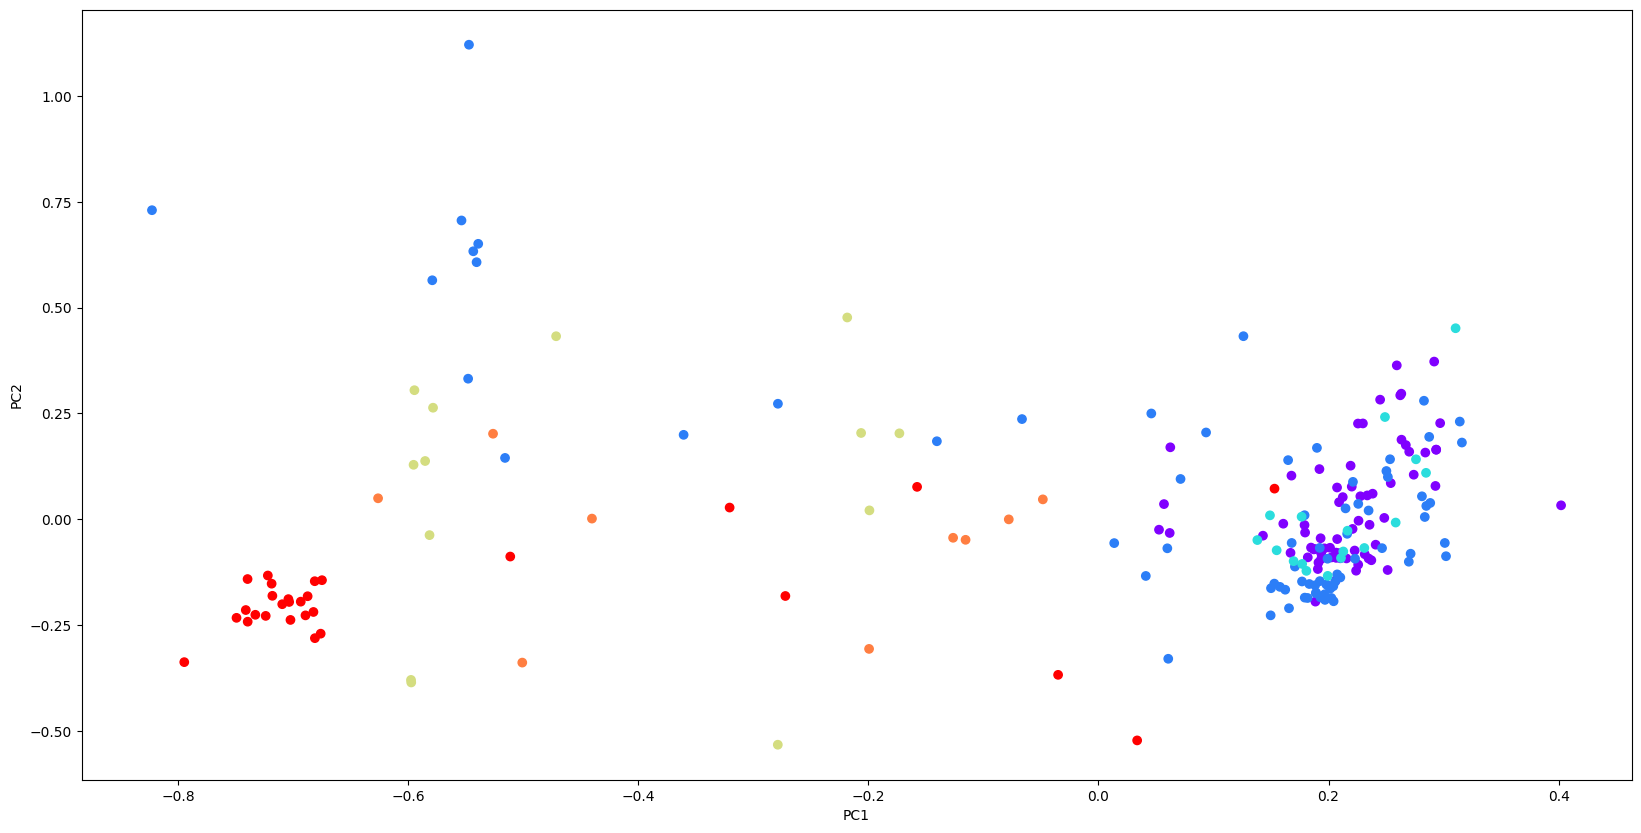

Доли объясненной дисперсии для главных компонент:
Компонента 1: 0.4543 (45.43%)
Компонента 2: 0.1799 (17.99%)

Сингулярные значения:
Компонента 1: 5.1049
Компонента 2: 3.2125


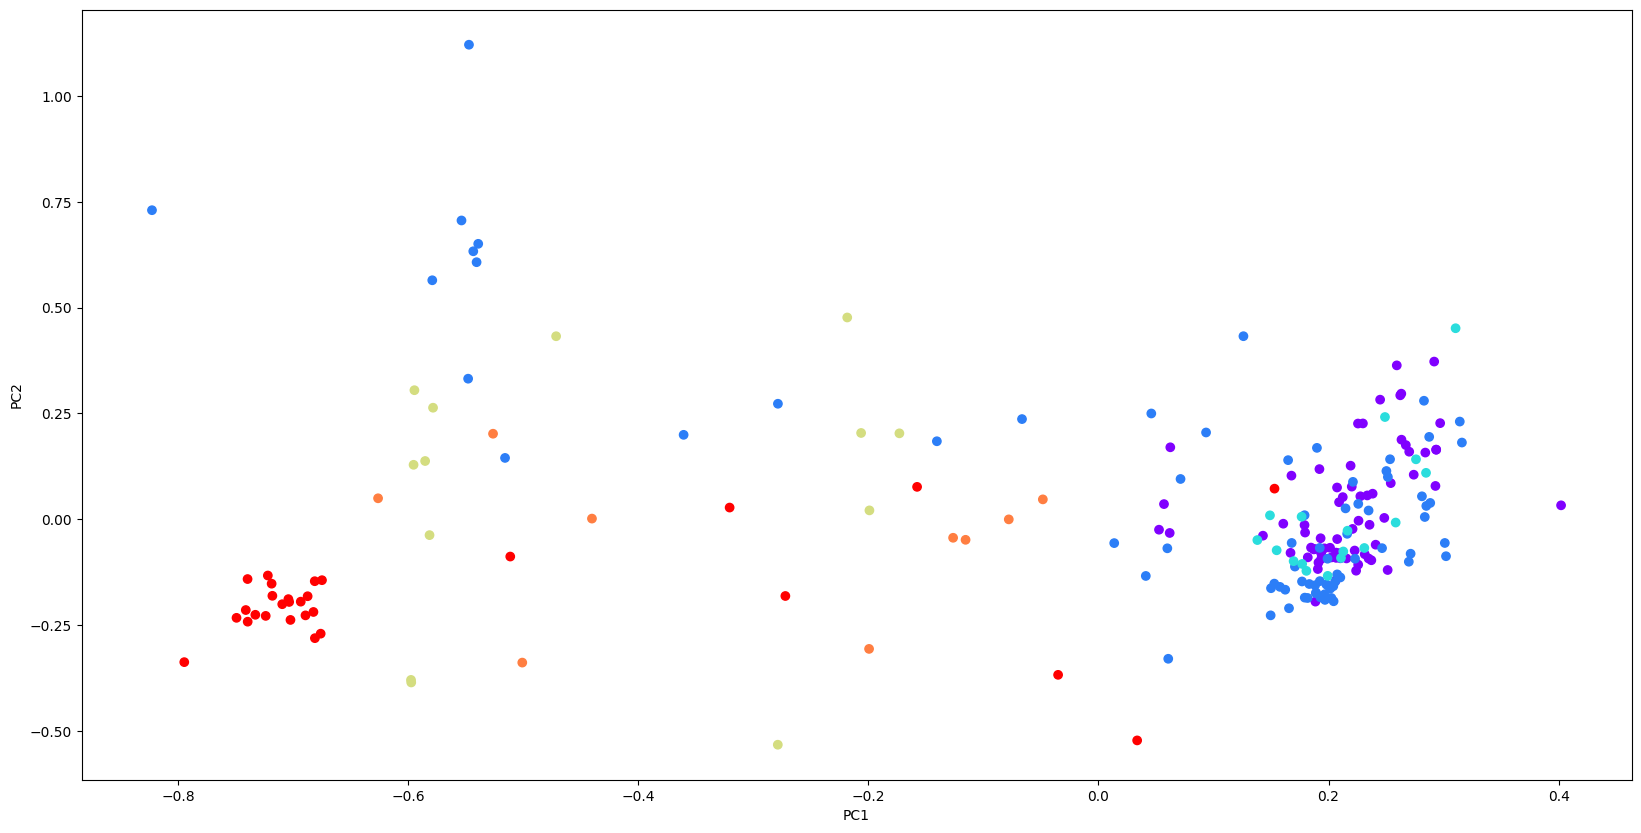

Доли объясненной дисперсии для главных компонент:
Компонента 1: 0.4543 (45.43%)
Компонента 2: 0.1799 (17.99%)

Сингулярные значения:
Компонента 1: 5.1049
Компонента 2: 3.2125


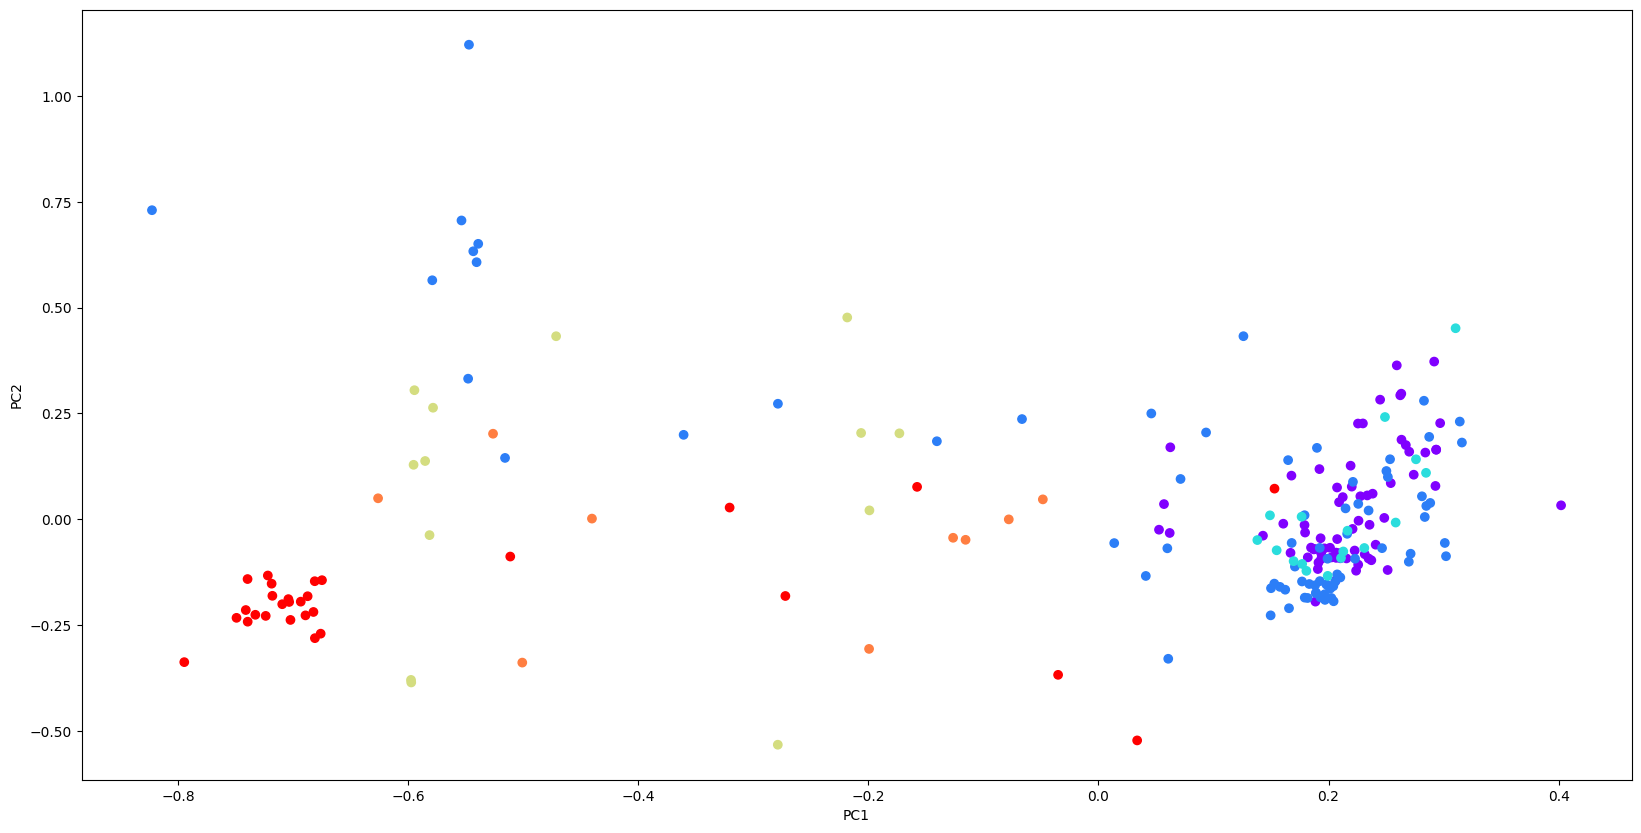

In [44]:
# 2.7 Исследуем метод главных компонент при различных параметрах svd_solver.
# По полученным результатам разница не была обнаружена.
# Есть возможность, что сама разница заключается в скорости вычислений, так как как параметр svd_solver отвечает за метод SVD (Single Value Decomposition).

def run_pca(svd_solver):
    pca = PCA(n_components= 2, svd_solver=svd_solver)

    pca_data = pca.fit(data).transform(data)

    print("Доли объясненной дисперсии для главных компонент:")
    for i, variance in enumerate(pca.explained_variance_ratio_):
        print(f"Компонента {i+1}: {variance:.4f} ({variance*100:.2f}%)")

    print("\nСингулярные значения:")
    for i, singular_value in enumerate(pca.singular_values_):
        print(f"Компонента {i+1}: {singular_value:.4f}")

    fig, axs = plt.subplots(1, 1, figsize=(20, 10)) 

    axs.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow')
    axs.set_xlabel('PC1')
    axs.set_ylabel('PC2')

    plt.show()

run_pca('full')
run_pca('arpack')
run_pca('randomized')

Модификации метода главных компонент

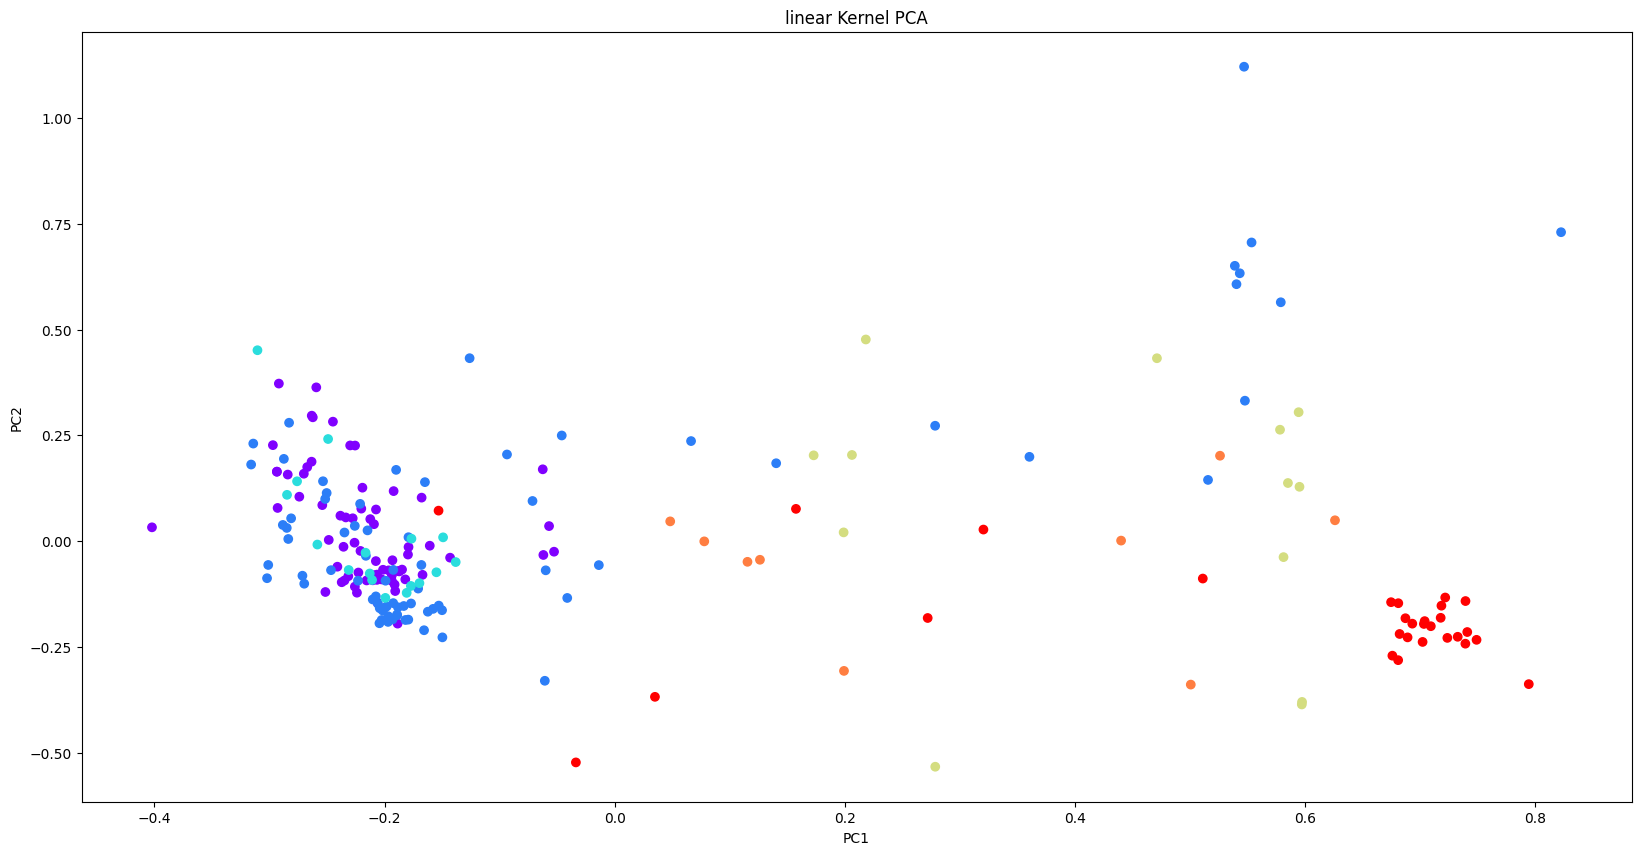

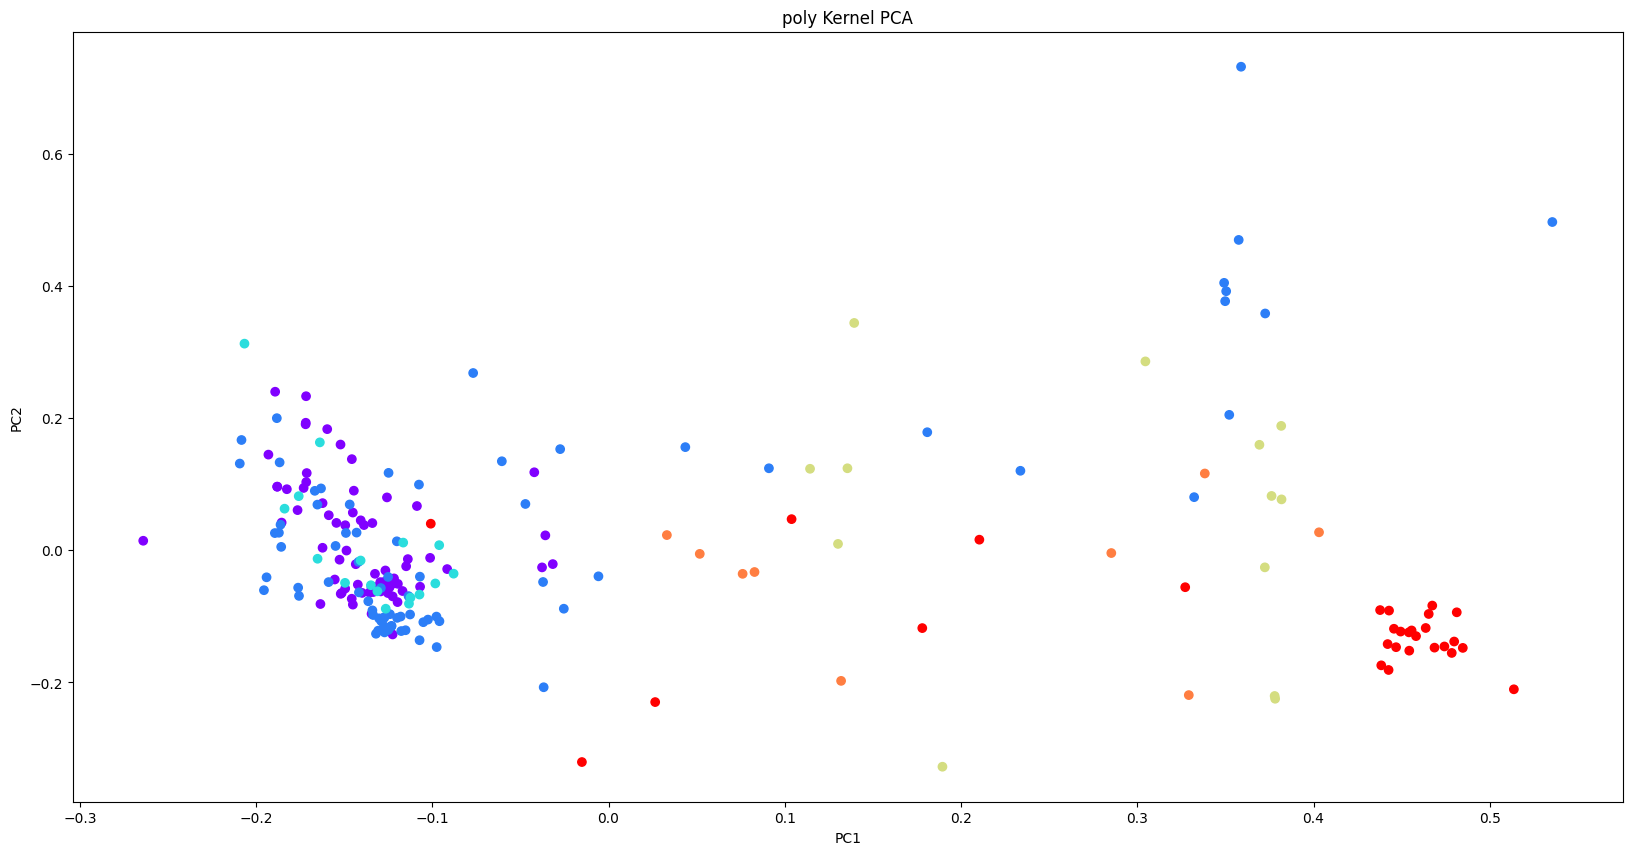

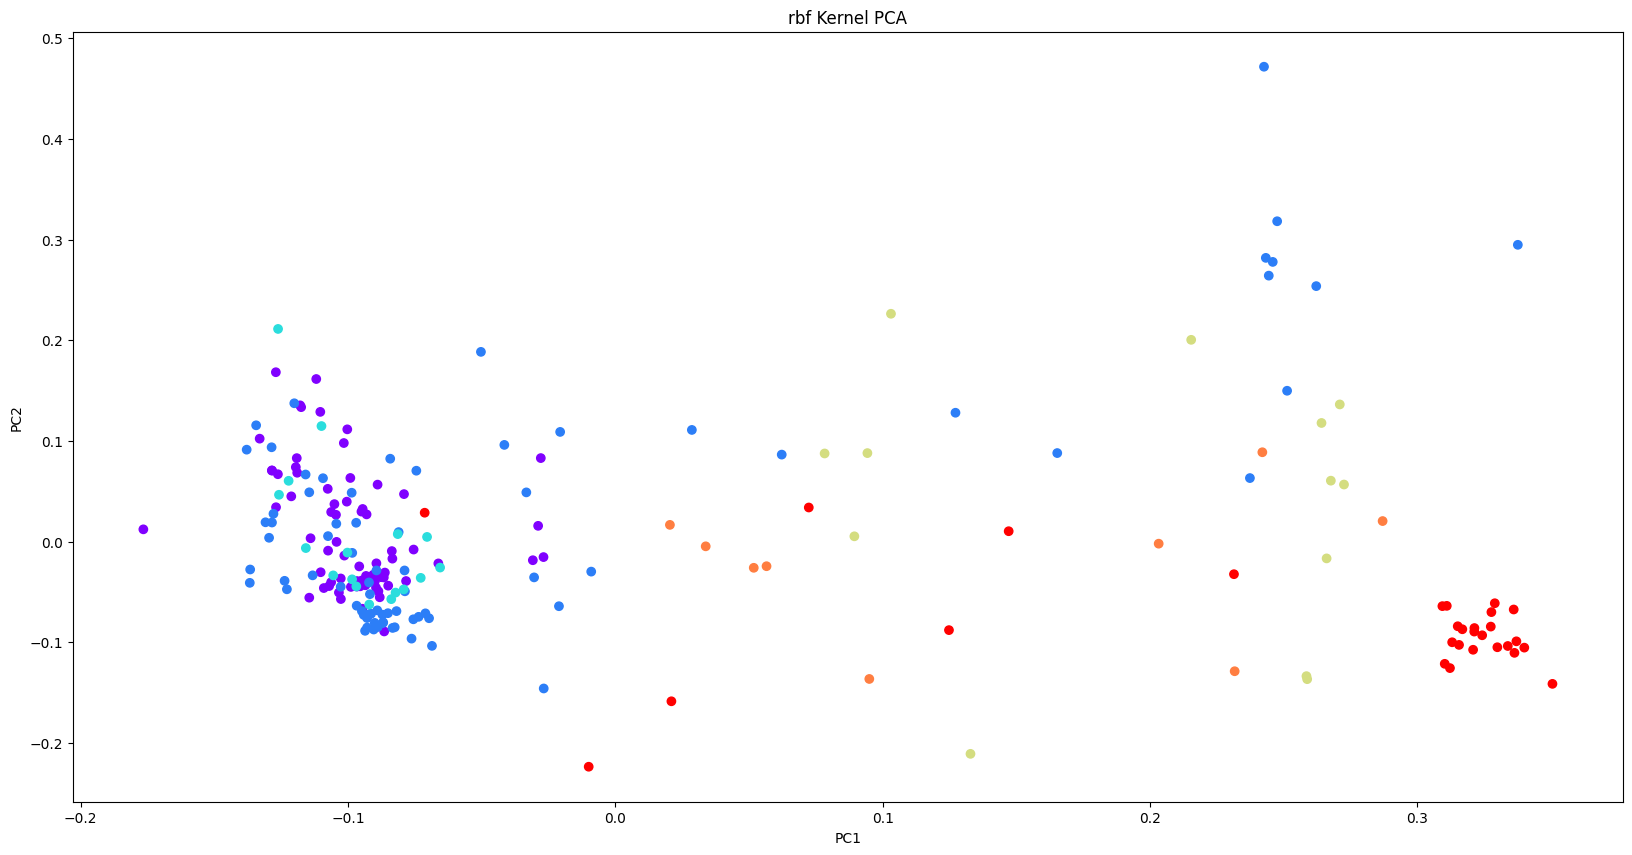

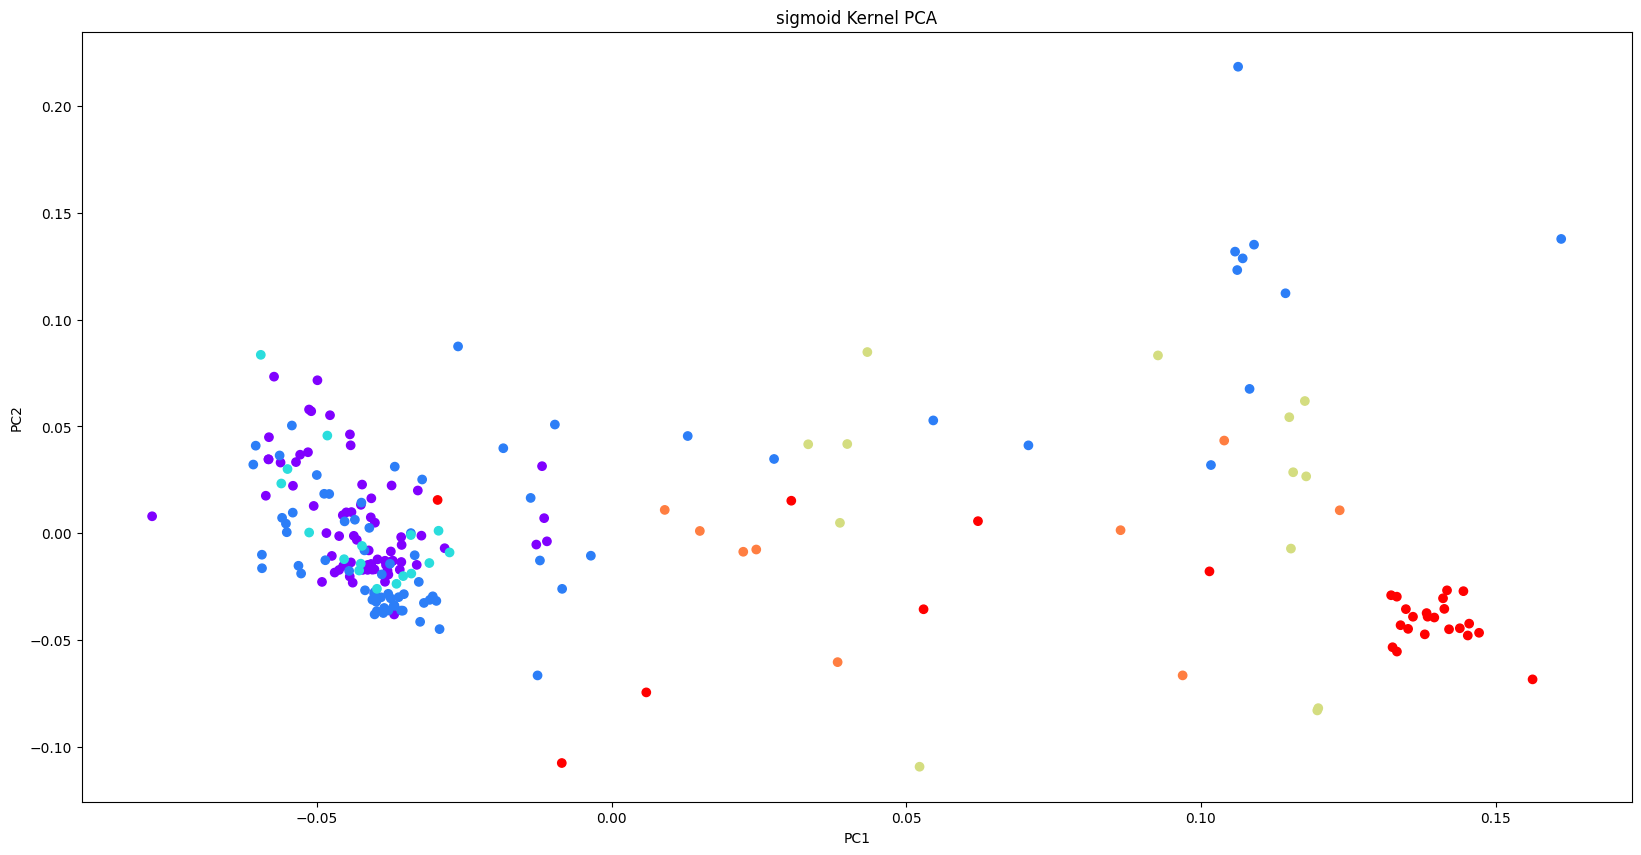

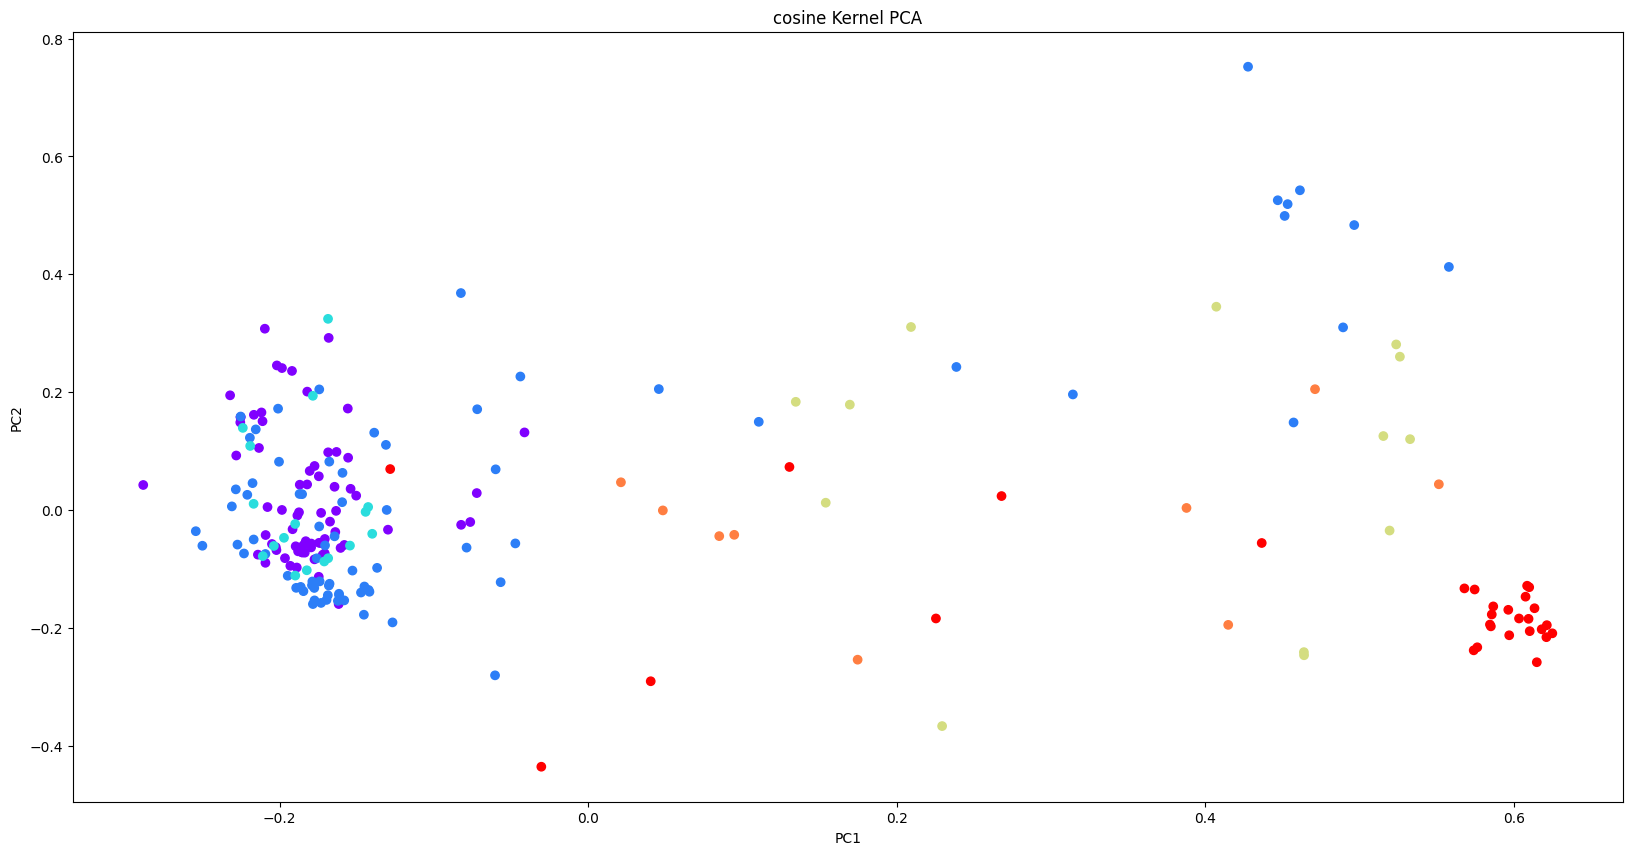

In [50]:
# 3.1 По аналогии с PCA исследуем KernelPCA для различных параметров kernel и различных параметрах для ядра

from sklearn.decomposition import KernelPCA

def kpca_run (kernel):
    pca = KernelPCA(n_components = 2, kernel=kernel)

    pca_data = pca.fit(data).transform(data)

    fig, axs = plt.subplots(1, 1, figsize=(20, 10))

    axs.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow')
    axs.set_xlabel('PC1')
    axs.set_ylabel('PC2')

    axs.set_title(f'{kernel} Kernel PCA')

    plt.show()

kpca_run('linear')
kpca_run('poly')
kpca_run('rbf')
kpca_run('sigmoid')
kpca_run('cosine')

In [14]:
# KPCA является более гибким инструментом, так как позволяет изменять тип используемого ядра 
# Основное различие между KPCA и PCA заключается в том, что PCA выполняет линейные преобразования, тогда как KPCA может обрабатывать нелинейные зависимости в данных

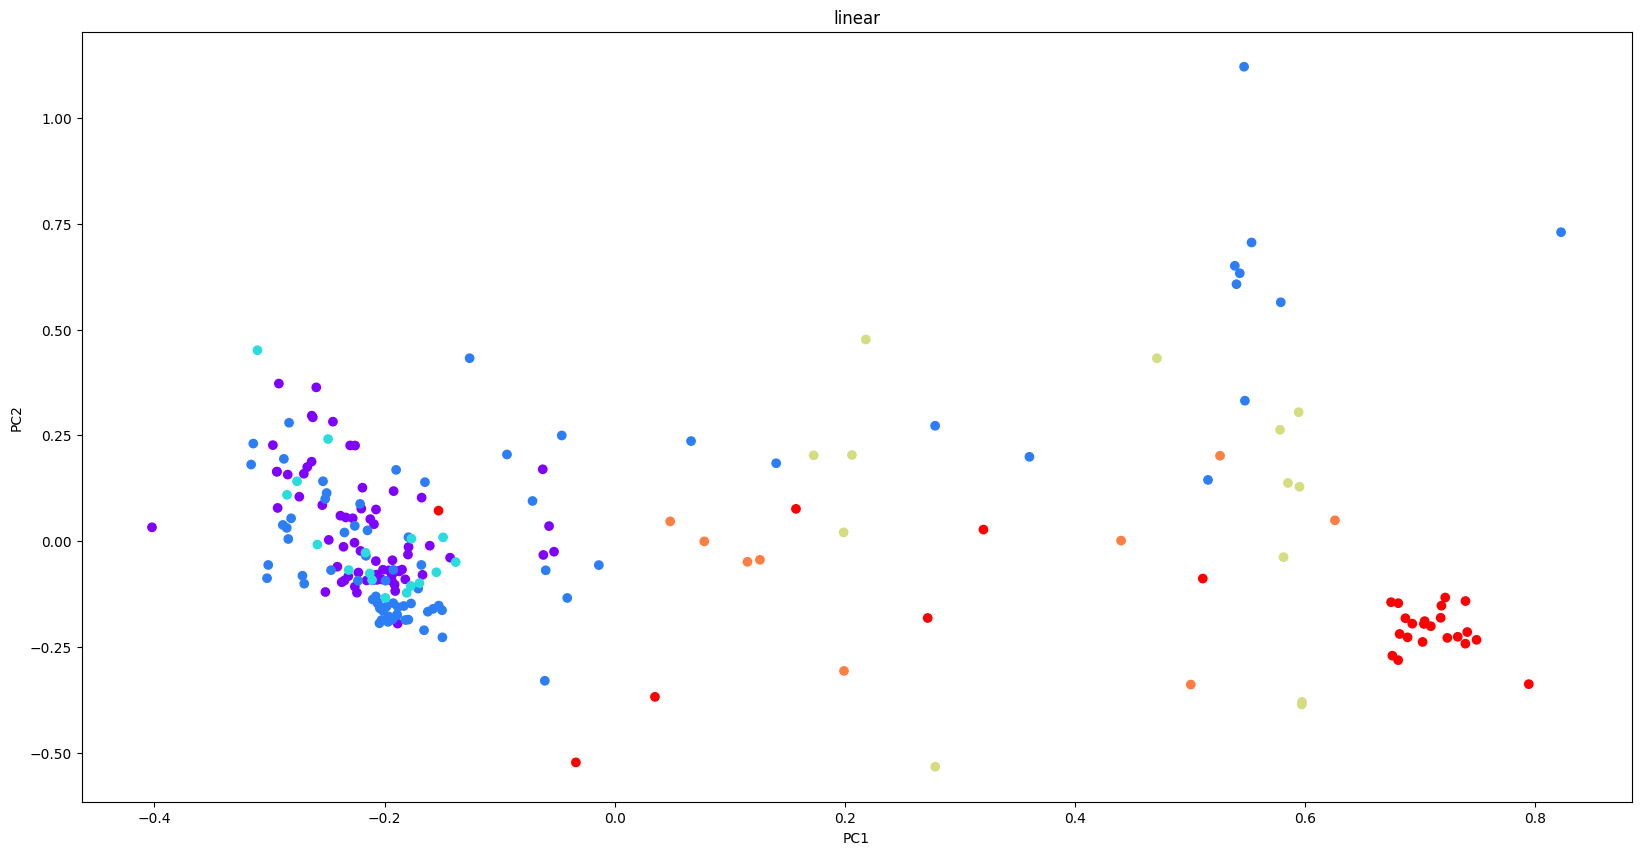

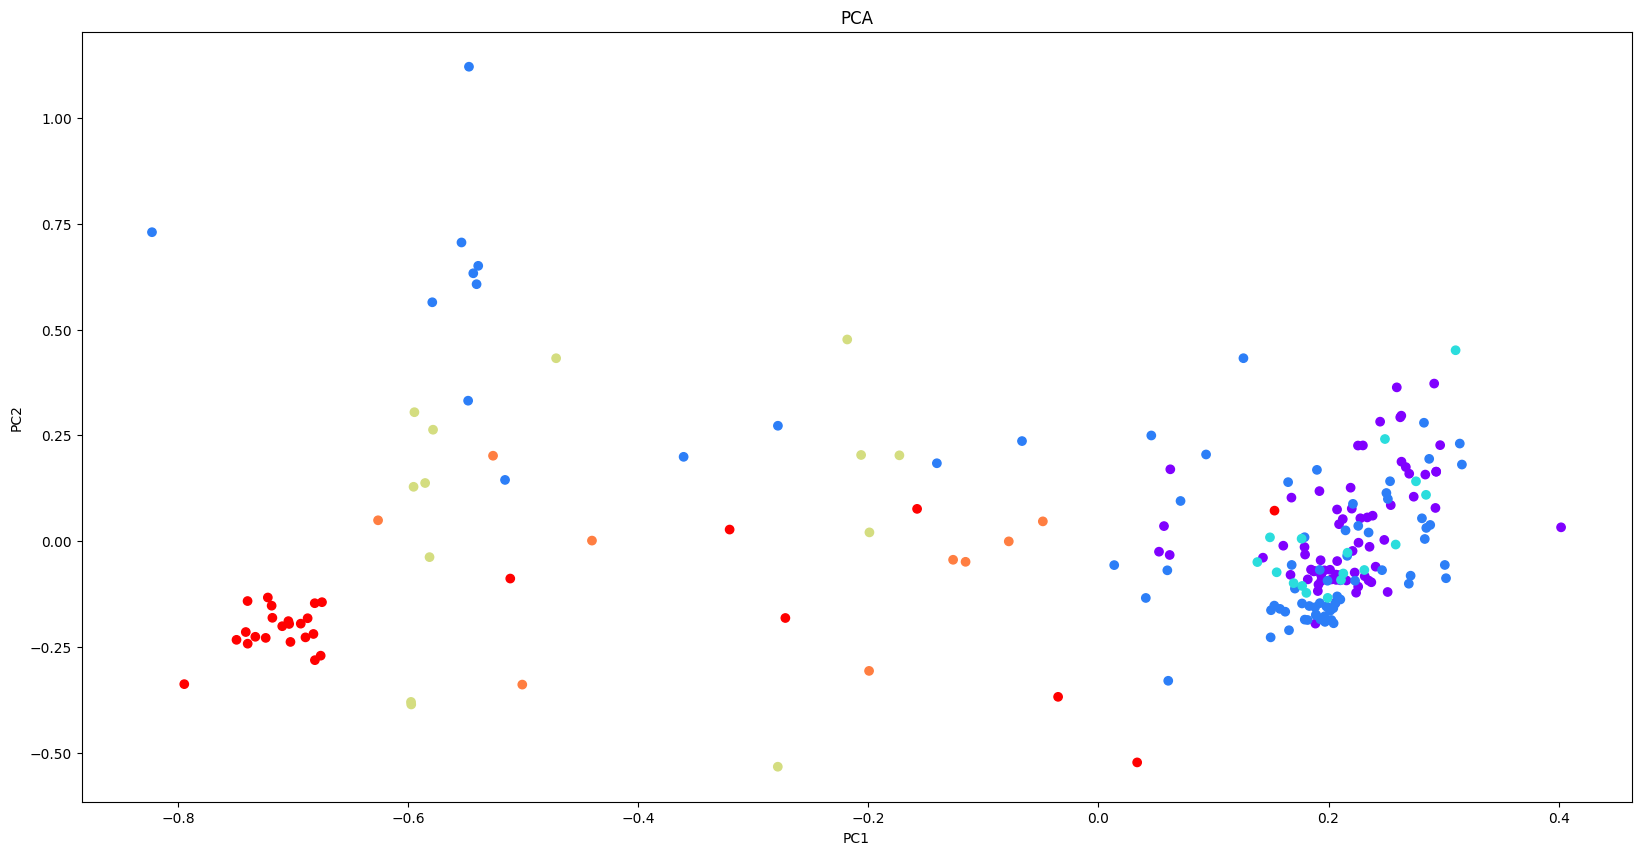

In [48]:
# 3.2 KernelPCA работает аналогично PCA при параметре 'linear'
kpca_run('linear')

pca = PCA(n_components= 2)
pca_data = pca.fit(data).transform(data)

fig, axs = plt.subplots(1, 1, figsize=(20, 10)) 

plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='rainbow')
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')

axs.set_title('PCA')
plt.show()

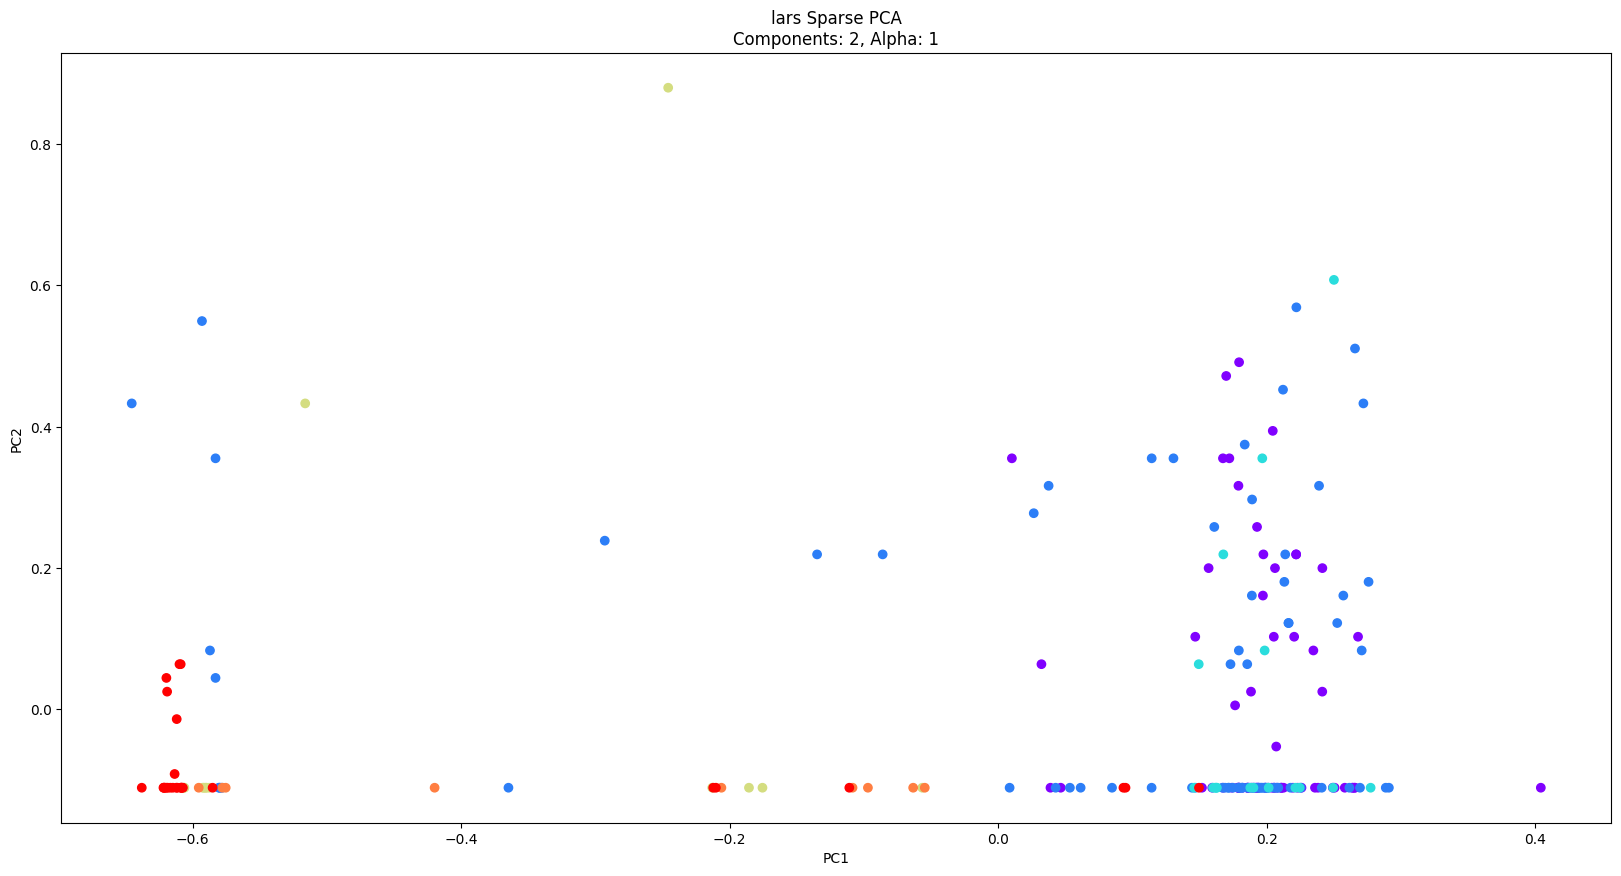

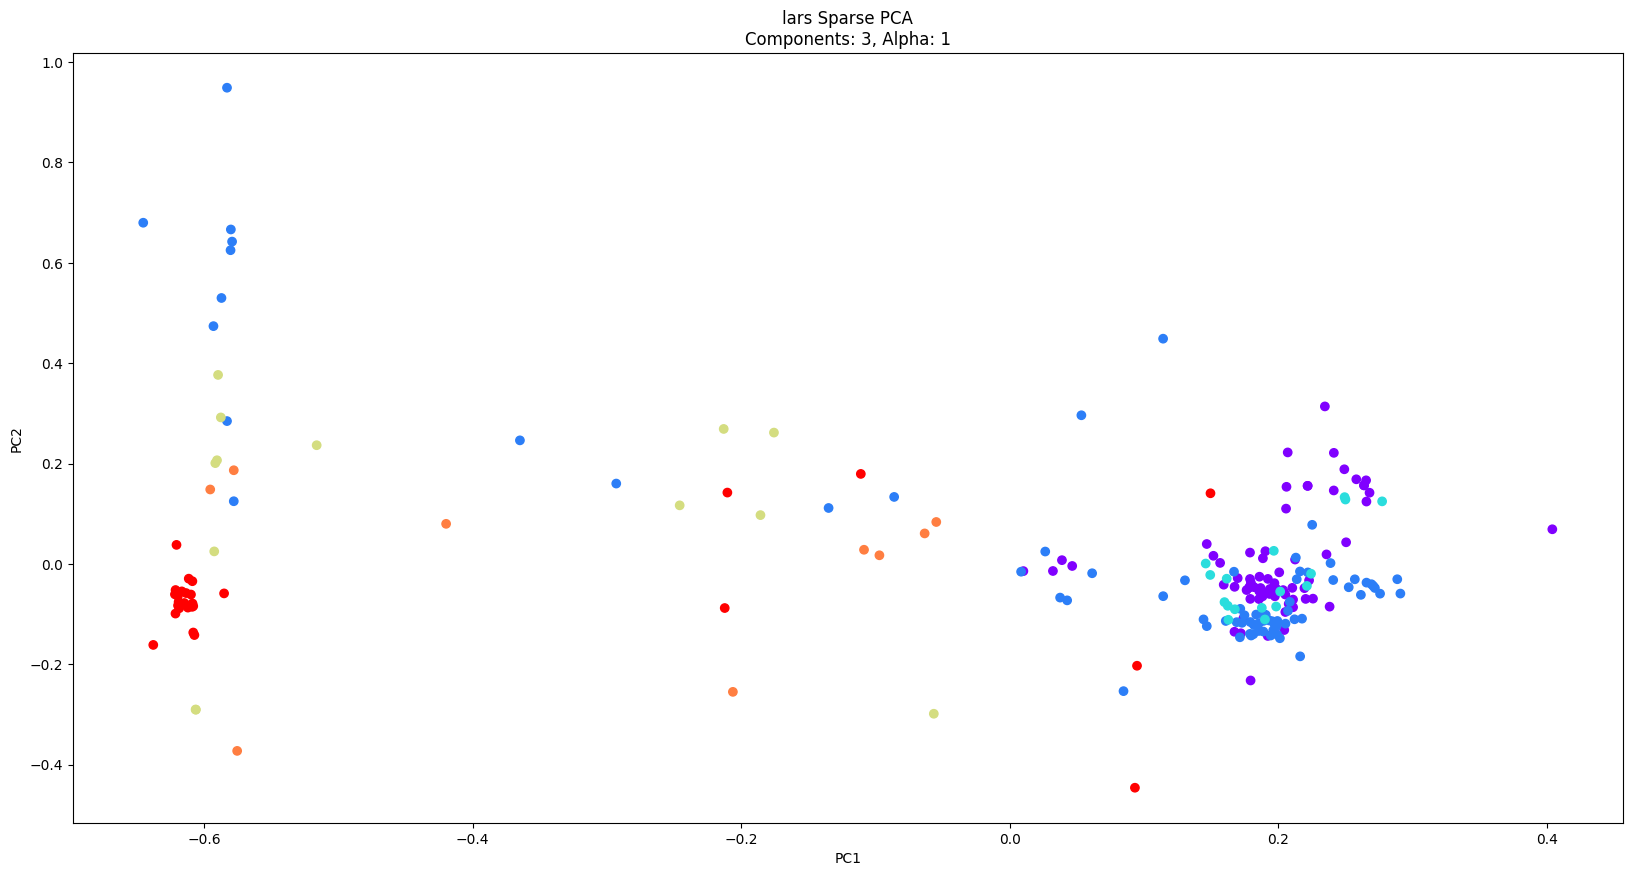

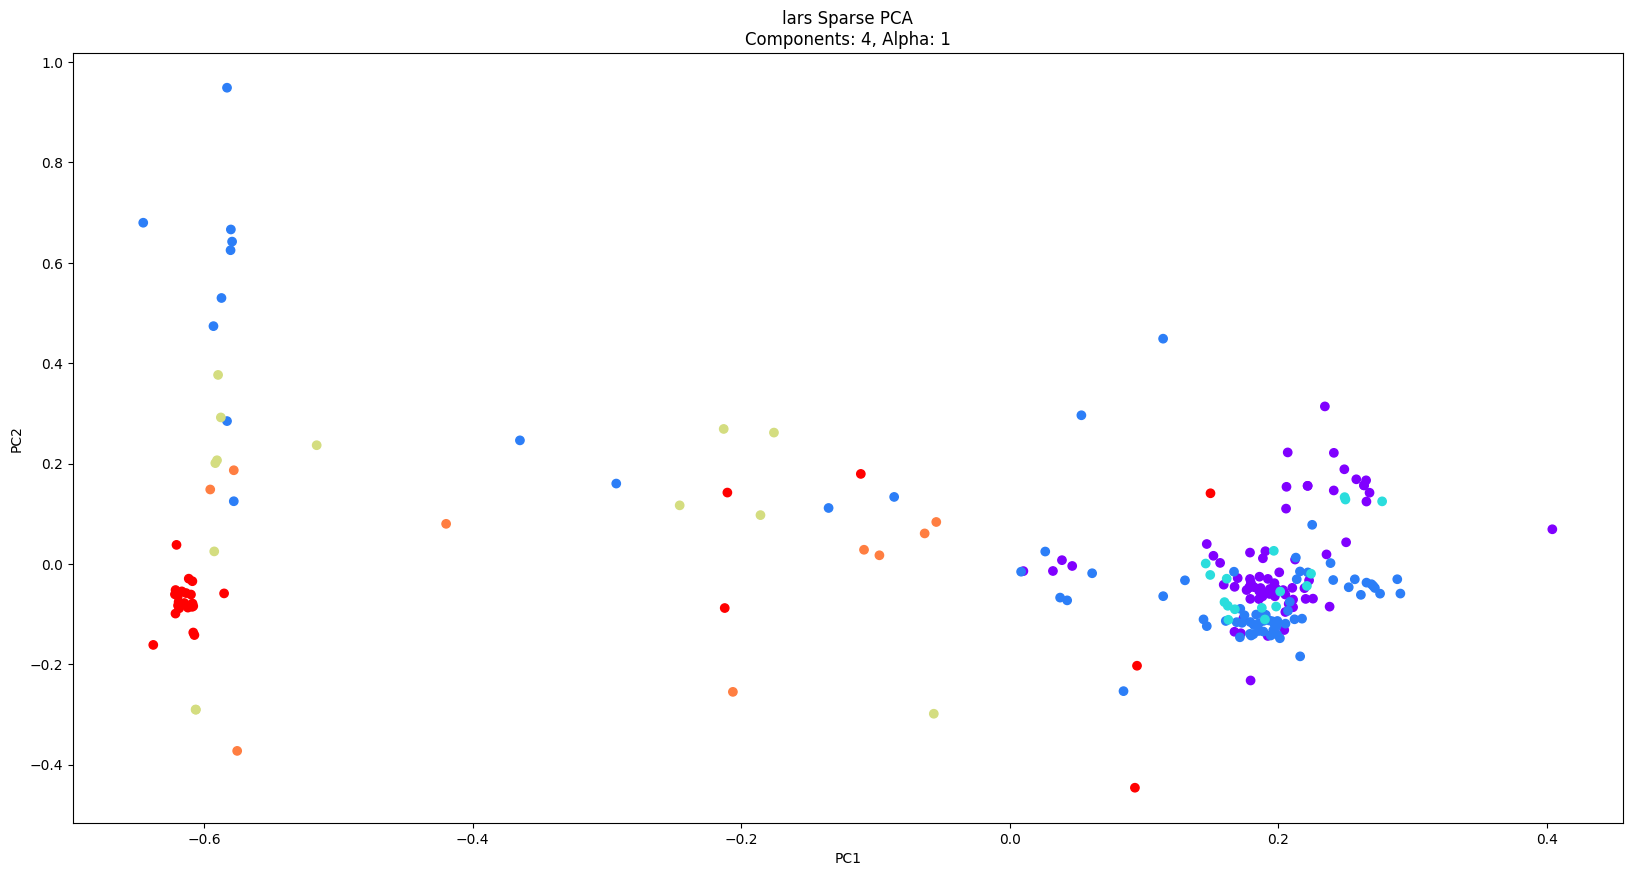

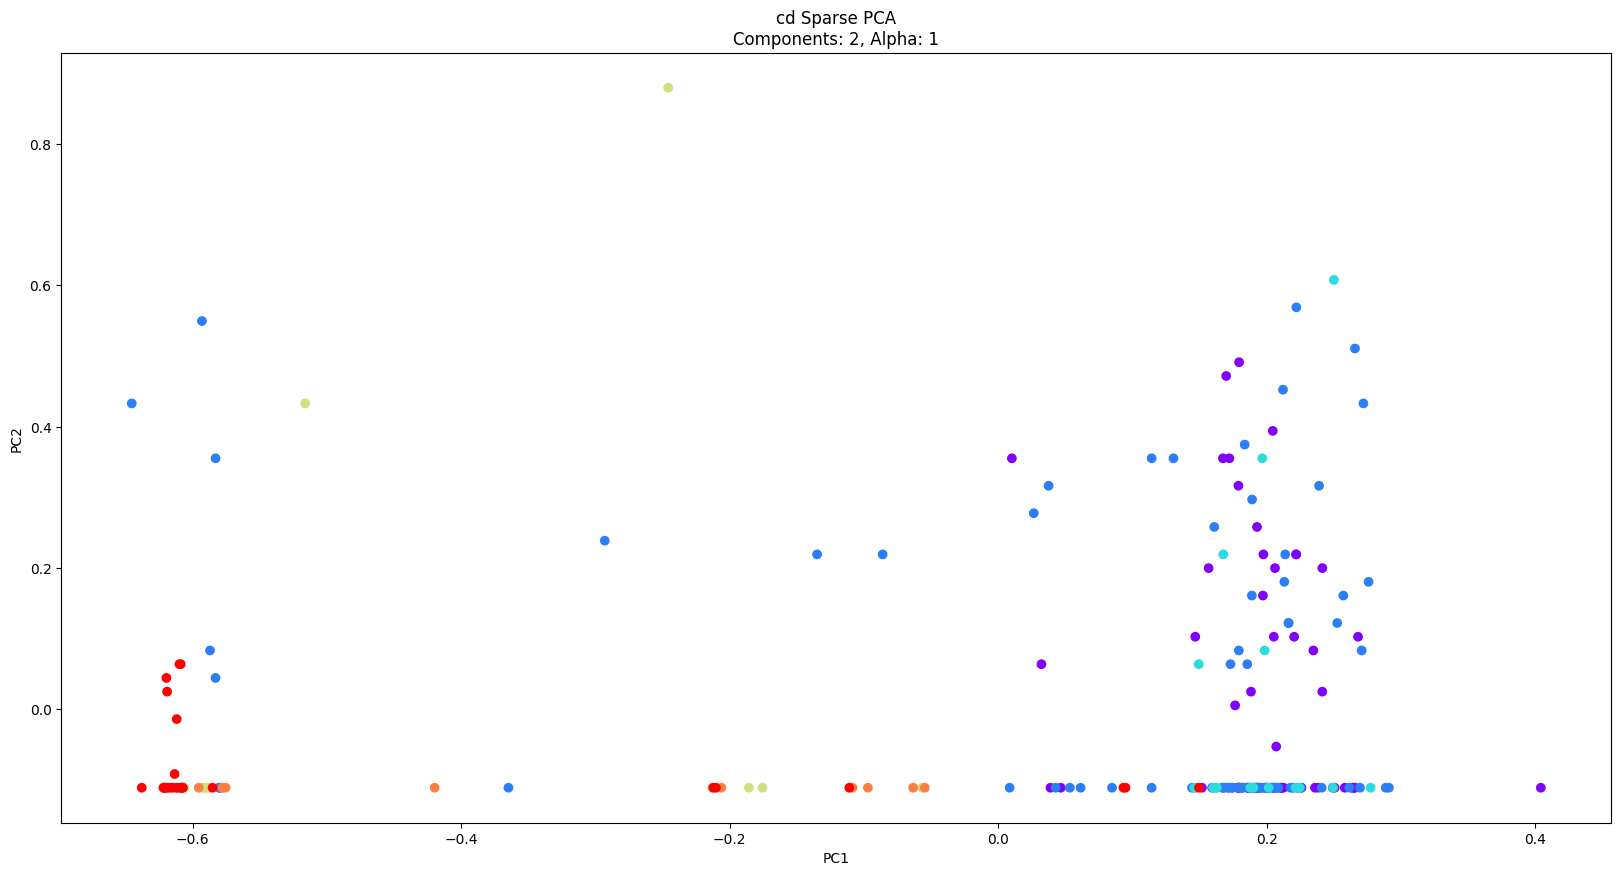

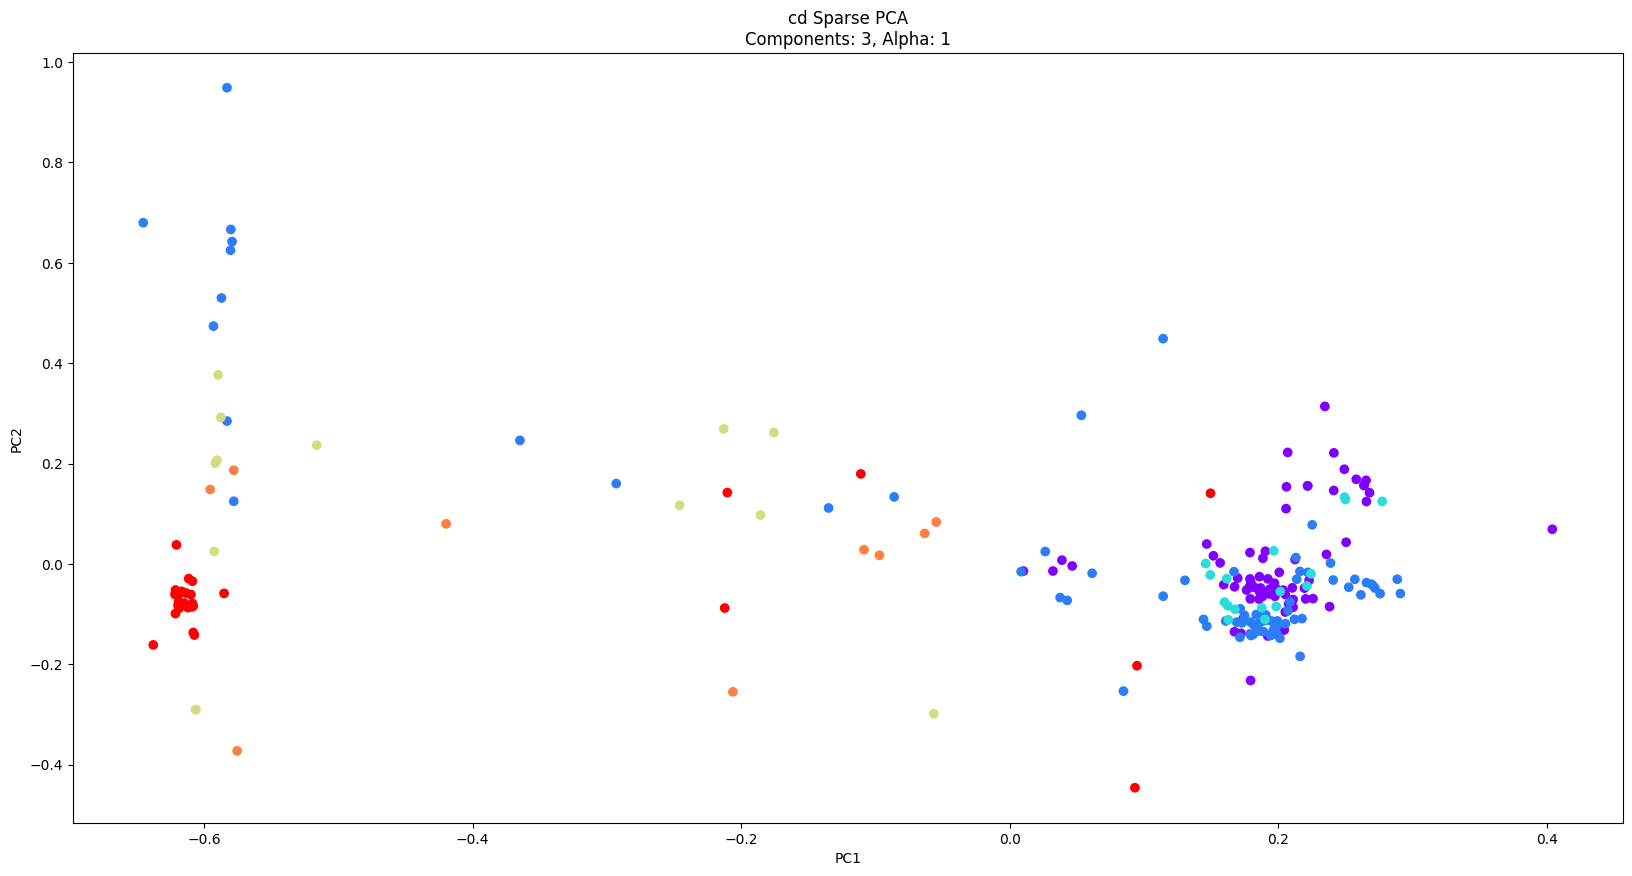

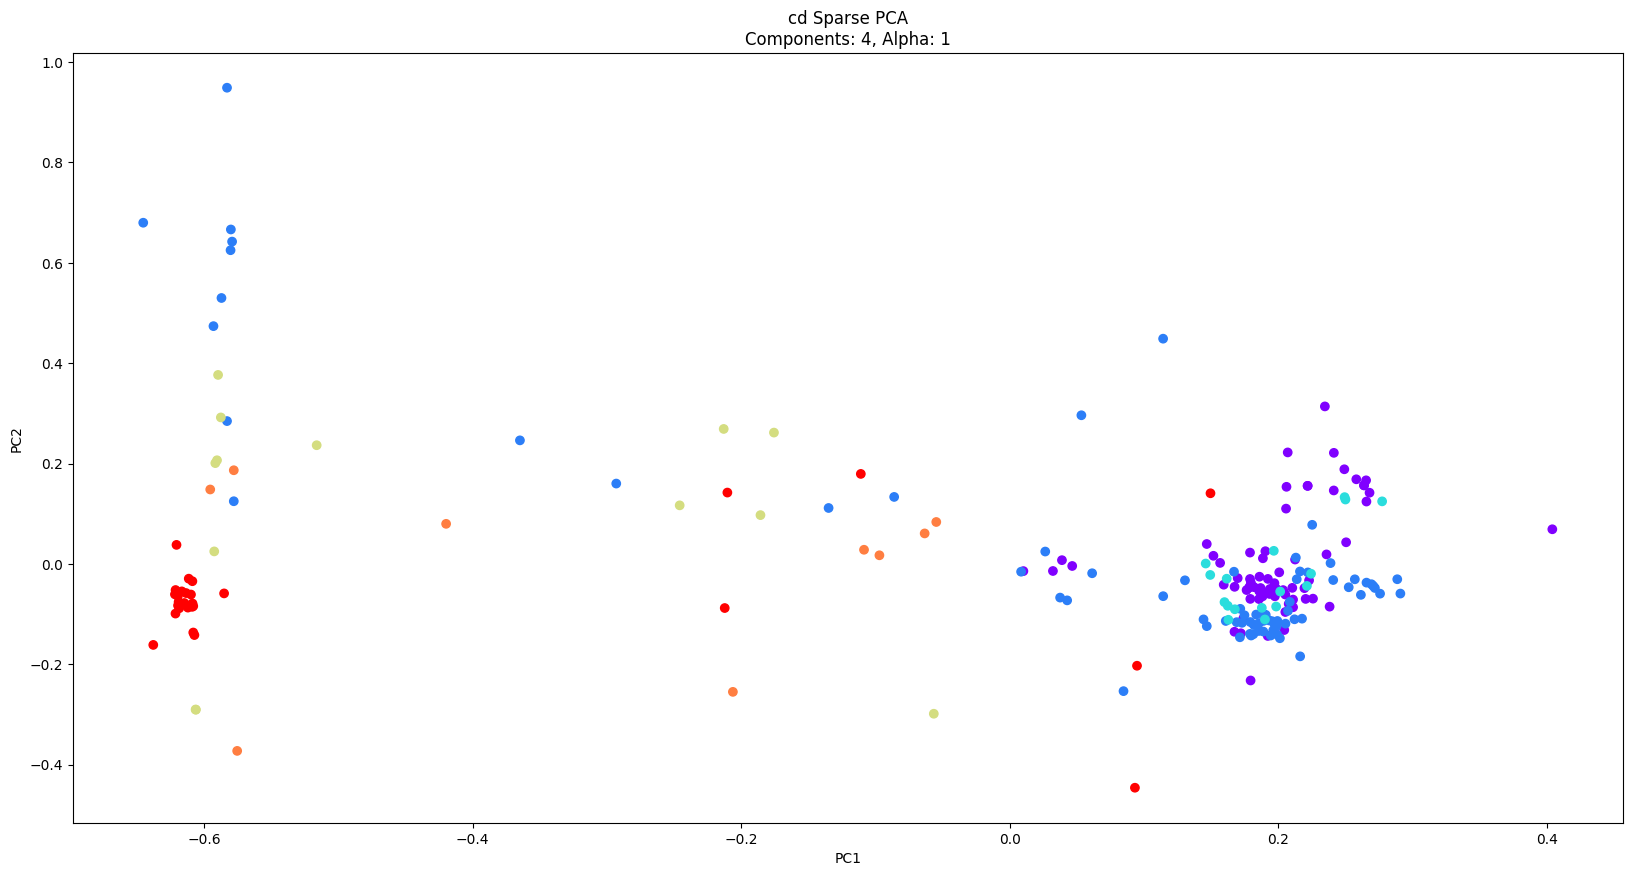

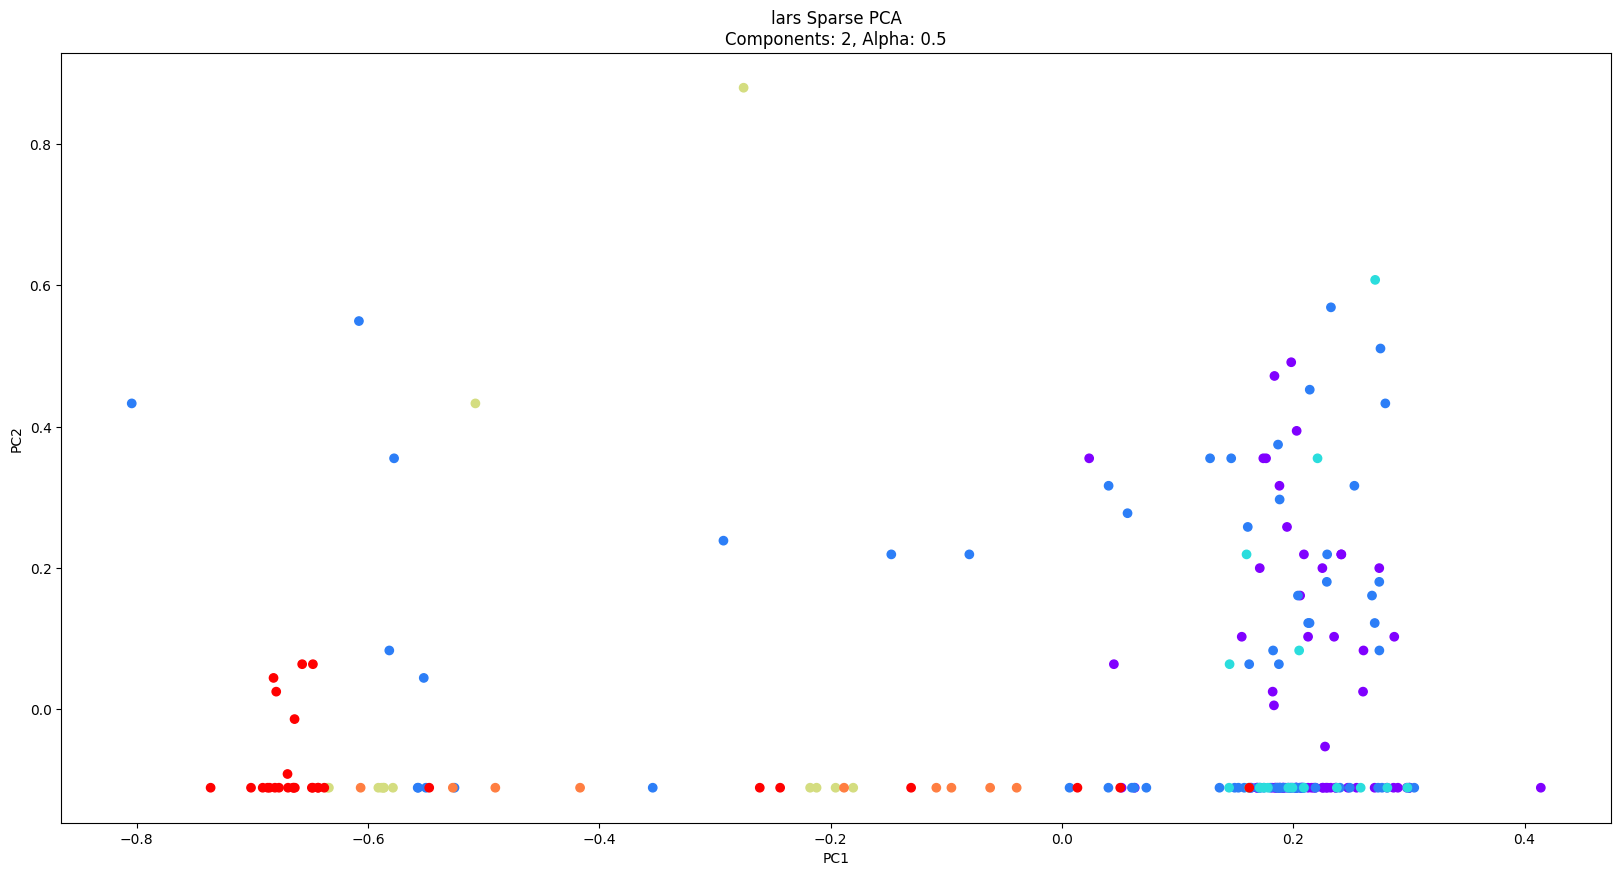

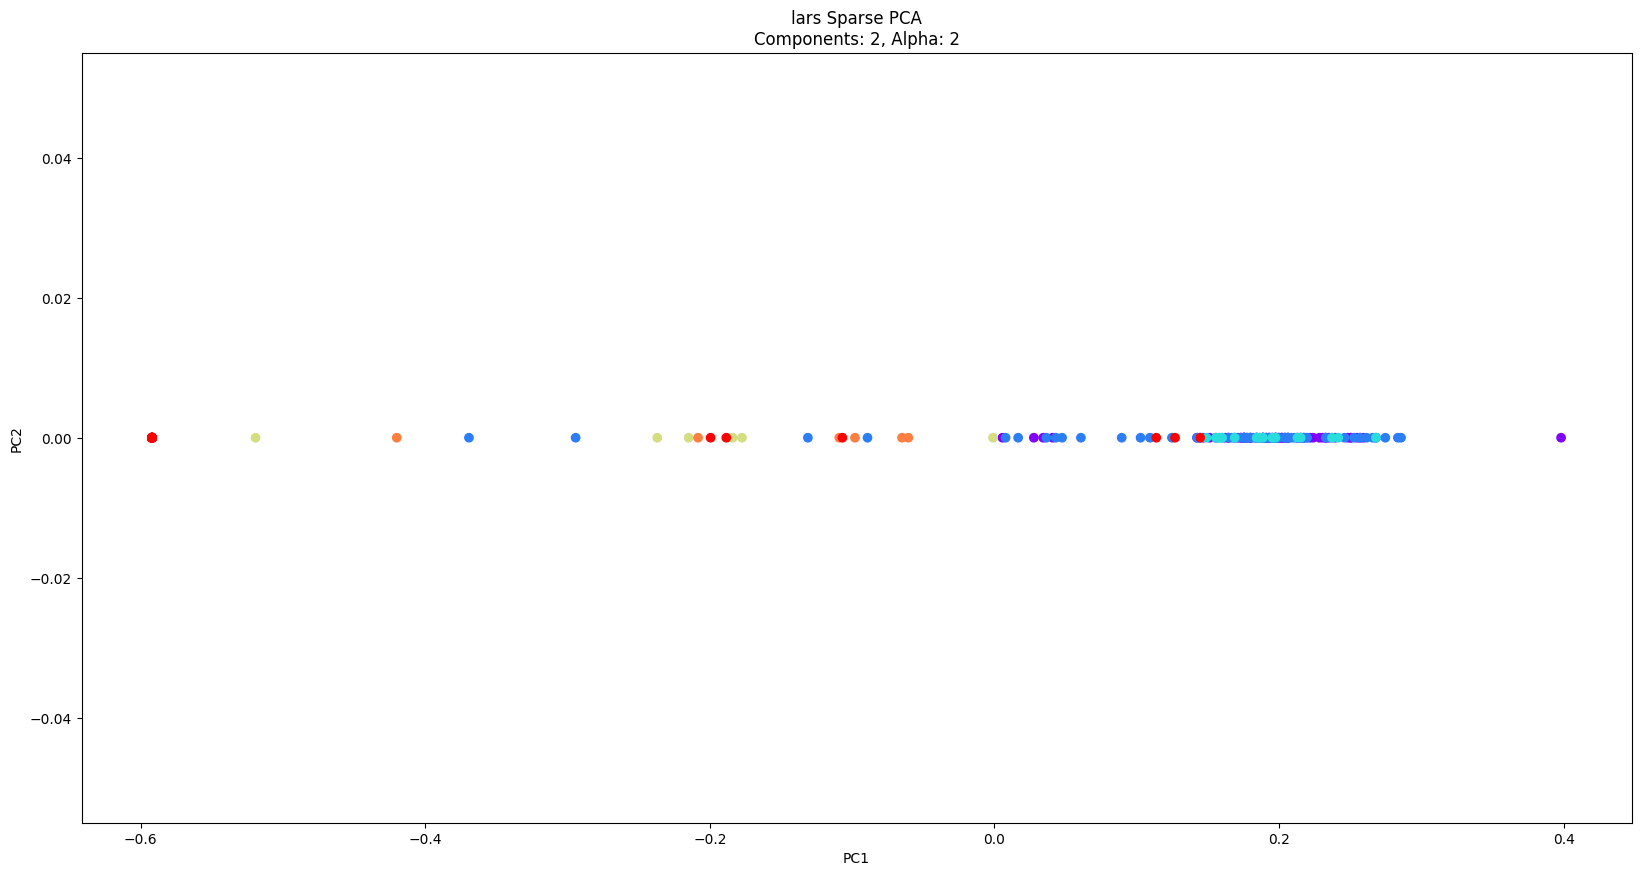

In [57]:
# 3.3 Аналогично исследуем ScarcePCA 
# KernelPCA будет работать аналогично SparsePCA только с линейным ядром и с применением методов для достижения разреженности в результатах. 
# KernelPCA предназначен для выявления нелинейных структур в данных, а SparsePCA ориентирован на создание разреженных представлений. 

from sklearn.decomposition import SparsePCA

def spca_run (n_components, method, alpha):
    spca = SparsePCA(n_components = n_components, method=method, alpha=alpha)

    spca_data = spca.fit(data).transform(data)

    fig, axs = plt.subplots(1, 1, figsize=(20, 10))

    axs.scatter(spca_data[:, 0], spca_data[:, 1], c=labels, cmap='rainbow')
    axs.set_xlabel('PC1')
    axs.set_ylabel('PC2')

    axs.set_title(f'{method} Sparse PCA\nComponents: {n_components}, Alpha: {alpha}')

    plt.show()

spca_run(n_components= 2, method= 'lars', alpha= 1)
spca_run(n_components= 3, method= 'lars', alpha= 1)
spca_run(n_components= 4, method= 'lars', alpha= 1)
spca_run(n_components= 2, method= 'cd', alpha= 1)
spca_run(n_components= 3, method= 'cd', alpha= 1)
spca_run(n_components= 4, method= 'cd', alpha= 1)

spca_run(n_components= 2, method= 'lars', alpha= 0.5)
spca_run(n_components= 2, method= 'lars', alpha= 2)


Факторный анализ

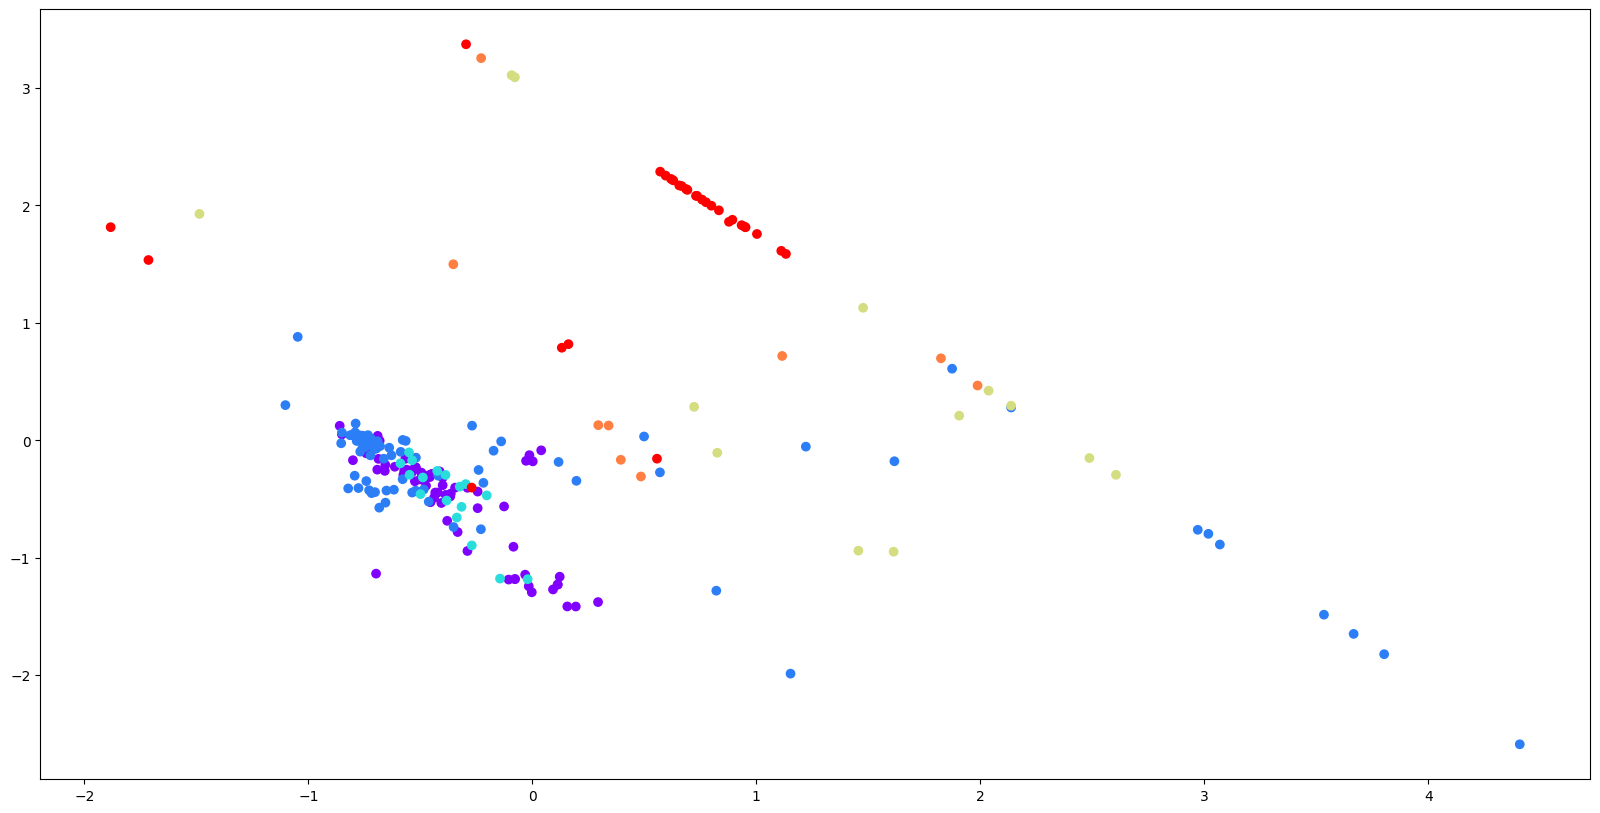

In [17]:
# 4.1 Понизим размерность используя факторный анализ FactorAnalysis.

from sklearn.decomposition import FactorAnalysis

def fa_run(tol):
    pca = FactorAnalysis(n_components = 2, tol=tol)

    pca_data = pca.fit(data).transform(data)

    fig, axs = plt.subplots(1,1, figsize=(20, 10))

    axs.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='rainbow')

    plt.show()

fa_run(0.01)

#  На FA диаграмме видно несколько групп точек, но факторы, найденные методом FA, не обязательно хорошо разделяют классы. 
# Основная цель FA — нахождение скрытых латентных факторов, которые будут объяснять зависимость между переменными.
# В PCA, в этом случае, будет максимизироваться дисперсия
# Красный и голубой классы явно отделяются друг от друга, но другие (синие и фиолетовые) перекрываются, что указывает на меньшую дифференциацию между группами

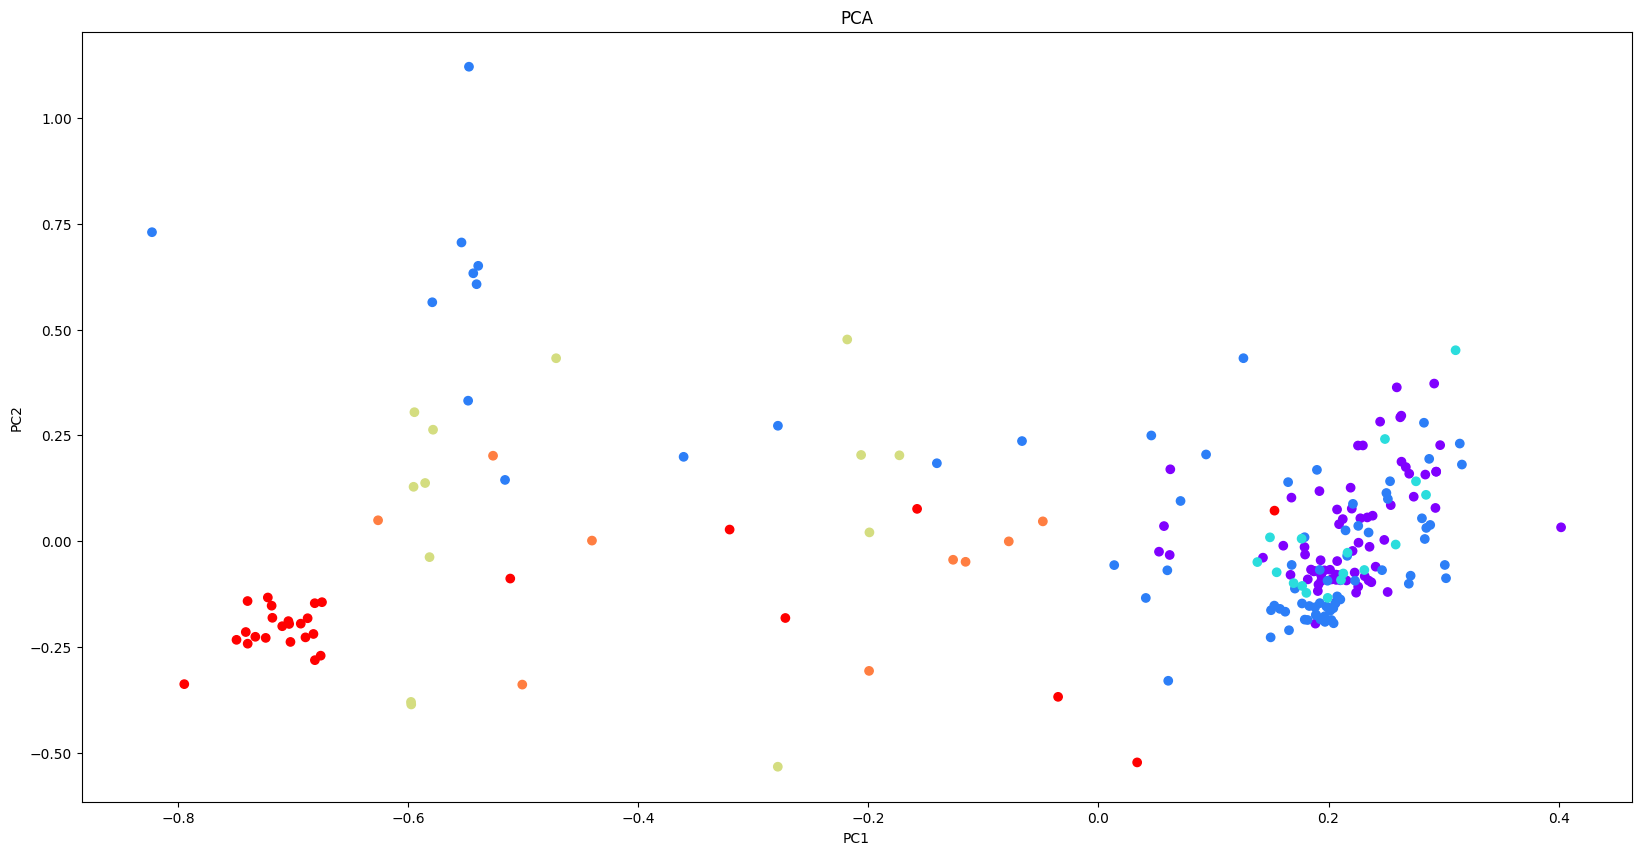

In [58]:
# 4.2 Сравним полученные результаты с PCA

pca = PCA(n_components= 2)
pca_data = pca.fit(data).transform(data)

fig, axs = plt.subplots(1, 1, figsize=(20, 10)) 

plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='rainbow')
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')

axs.set_title('PCA')
plt.show()


# На диаграмме PCA наблюдалось лучшее разделение данных по первым двум главным компонентам.
# PCA акцентирует оси, вдоль которых дисперсия максимальна.
# На PCA диаграммах классы 1, 2, 3, имеющие высокую дисперсию разделялись более явно. 

In [19]:
# 4.3 Разница между методом главных компоненты и факторным анализом

# PCA: Основное внимание уделяется максимальной дисперсии данных, это позволяет более явно различать классы, при их различной структуре или характере распределения. В результате видим более четкое разделение групп.
# FA: Сосредоточен на объяснении корреляций и ковариации между переменными. В результате найденные факторы не так чётко разделяют классы.
